## Numerical Testing

In [1]:
from helper import obmat, obvec, intvec, exp, log, sin, cos, tan, sqrt
from bounding import optimal_centerd_forms
from solver import improved_BandB, improved_boxres_BandB
import cProfile
import pstats
from pstats import SortKey
from analyzing import iterations_in_decision_space_plot, iterations_in_objective_space_plot
from pyinterval import interval
import numpy as np

### TP1 - multiple global edge solutions

#### Setting up the optimization problem

In [7]:
def func(x):
    return x[0] + x[1]

def grad(x):
    return obvec([1,1])

def cons(x):
    return obvec([-(x[0]**2 +x[1]**2) +4,-x[0] +x[1] -2,x[0] -x[1] -2,x[0]**2 +x[1]**2 -9])

def cons_div(x):
    return obmat([[-2*x[0],-1,1,2*x[0]],[-2*x[1],1,-1,2*x[1]]])

X = intvec([[0,3],[0,3]])

#### Applying the solver to the optimization problem

In [3]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, grad, cons, cons_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP1_stats")

#### Outprinting the solver run statistics

In [4]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP1_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 97
         3695629 function calls (3623885 primitive calls) in 2.085 seconds

   Ordered by: cumulative time
   List reduced from 118 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    2.115    2.115 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
      690    0.003    0.000    1.838    0.003 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:17(bounding_omega)
     3489    0.032    0.000    1.808    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
60385/32785    0.045    0.000    1.661    0.000 {built-in method builtins.max}
     3450    0.007    0.000    1.632    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:18(<genexpr>)
    56098    0.199    0.000    1.562    0.000 /Library/Frameworks/Python.framework/Versions/3.9/l

#### Checking for inclusion of the solution set

In [5]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (0,2), s2 = (2,0)")
print("Inclusion hold:",any((0 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((2 in Bi[0]) & (0 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (0,2), s2 = (2,0)
Inclusion hold: True , True


#### Plotting the solver approximation process

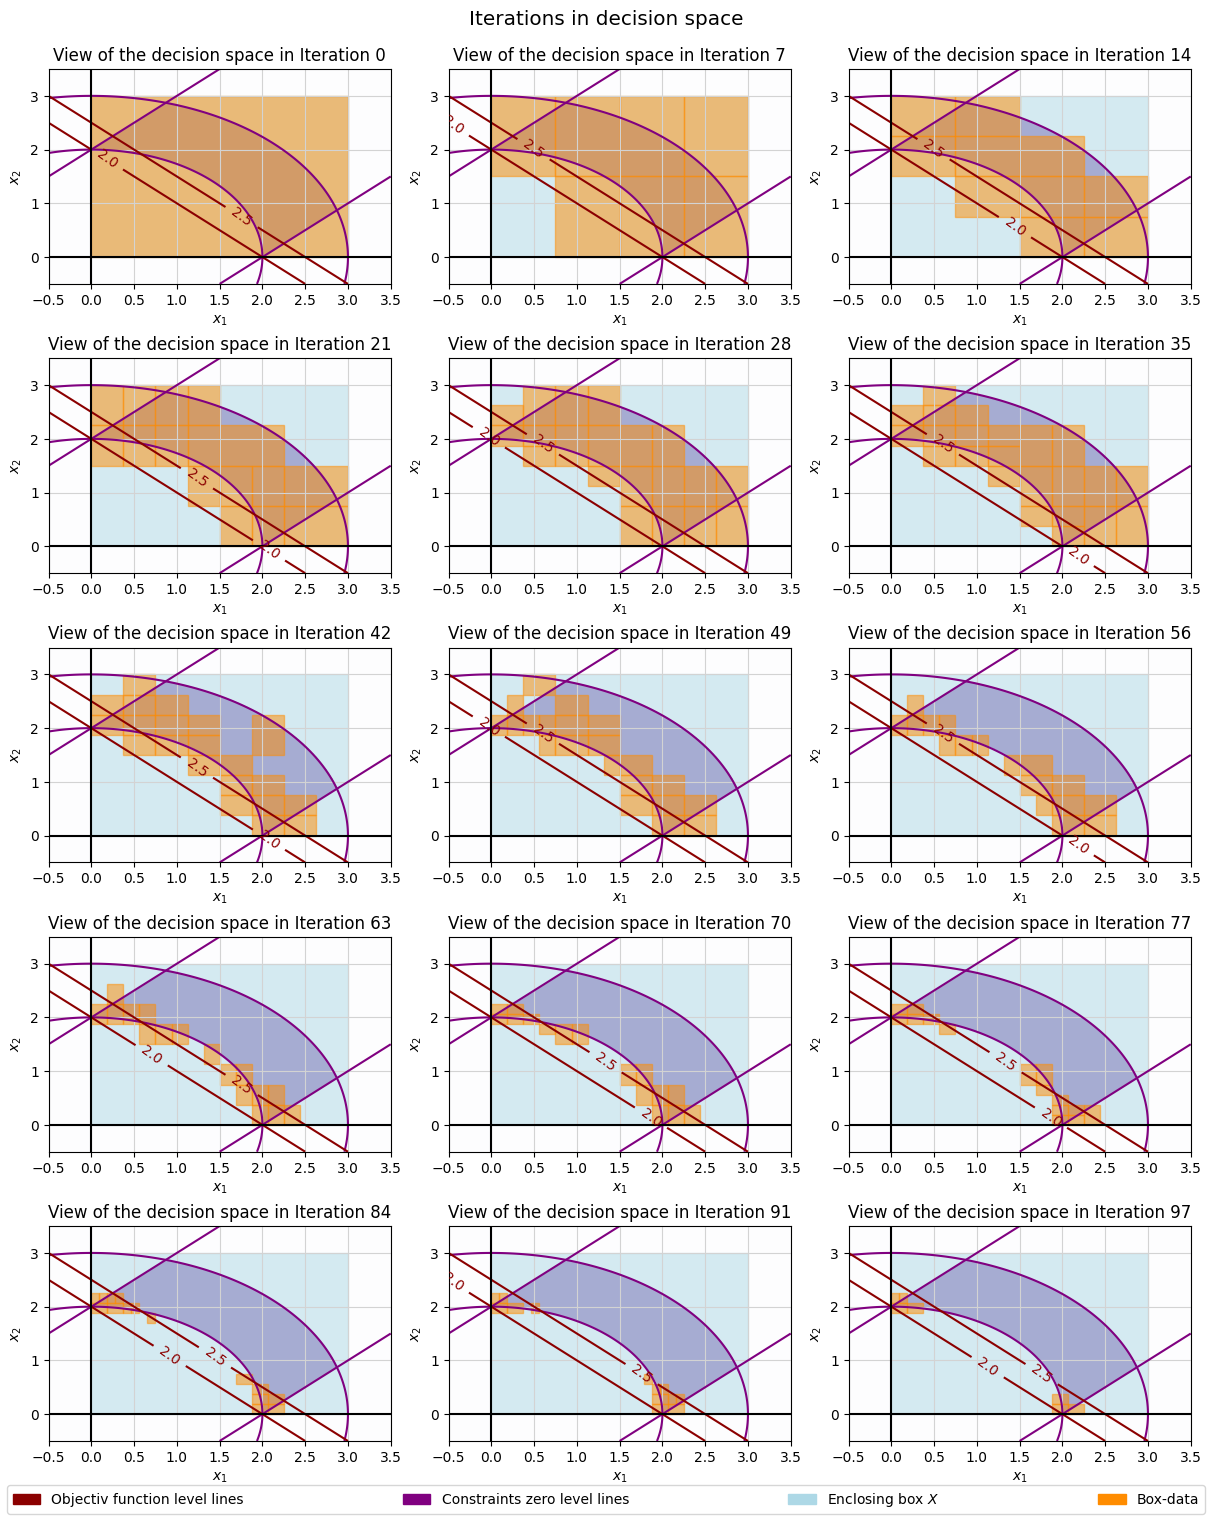

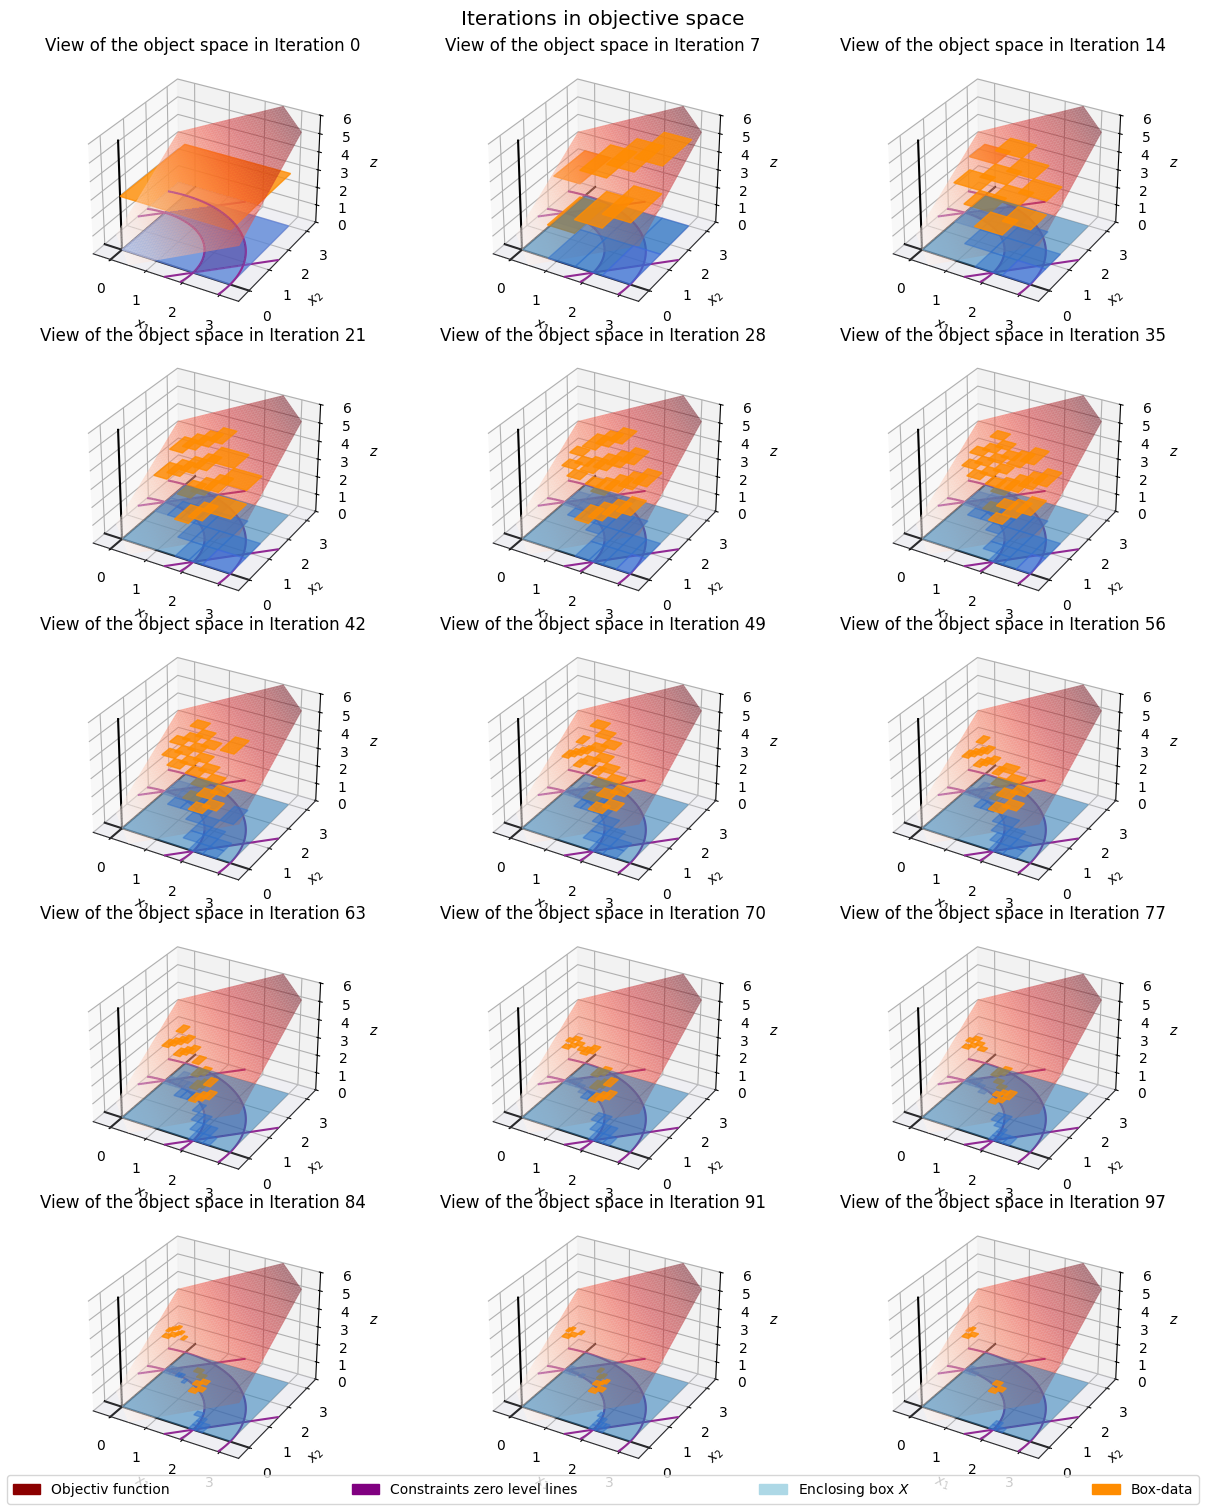

In [7]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/14)]
iterations.append(97)
iterations_in_decision_space_plot(func,cons,X,data_X,iterations,levels=[2,2.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,grad,cons,X,data_X,iterations,figsize=(12,15),facecolor="white")

### TP2 - multiple global interior and edge solutions

#### Setting up the optimization problem

In [8]:
def func(x):
    return -0.05*((x[0]-2)**2+(x[1]-2)**2)**3 +0.8*((x[0]-2)**2+(x[1]-2)**2)

def grad(x):
    return obvec([-0.3*(x[0]-2)*((x[0]-2)**2+(x[1]-2)**2)**2 +1.6*(x[0]-2),-0.3*(x[1]-2)*((x[0]-2)**2+(x[1]-2)**2)**2 +1.6*(x[1]-2)])

def cons(x):
    return obvec([(x[0]-3)**3 -3 +x[1],-x[0] +x[1] -2,x[0] -x[1] -2,-log((x[0]+0.5)*(x[1]+0.5))+1])

def cons_div(x):
    return obmat([[3*(x[0]-3)**2,-1,1,-1/(x[0]+0.5)],[1,1,-1,-1/(x[1]+0.5)]])

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [9]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, grad, cons, cons_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")

#### Outprinting the solver run statistics

In [14]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 175
         10050050 function calls (9933072 primitive calls) in 5.760 seconds

   Ordered by: cumulative time
   List reduced from 138 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.012    0.012    5.849    5.849 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
     5821    0.055    0.000    5.285    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
   199041    0.636    0.000    4.494    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     1151    0.005    0.000    3.972    0.003 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:17(bounding_omega)
141891/102780    0.094    0.000    3.774    0.000 {built-in method builtins.max}
   199041    0.272    0.000    3.660    0.000 /Library/Frameworks

#### Checking for inclusion of the solution set

In [15]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (2,2), s2 = (4,2), s3 = (2,4)")
print("Inclusion hold:",any((2 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((4 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((2 in Bi[0]) & (4 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (2,2), s2 = (4,2), s3 = (2,4)
Inclusion hold: True , True , True


#### Plotting the solver approximation process

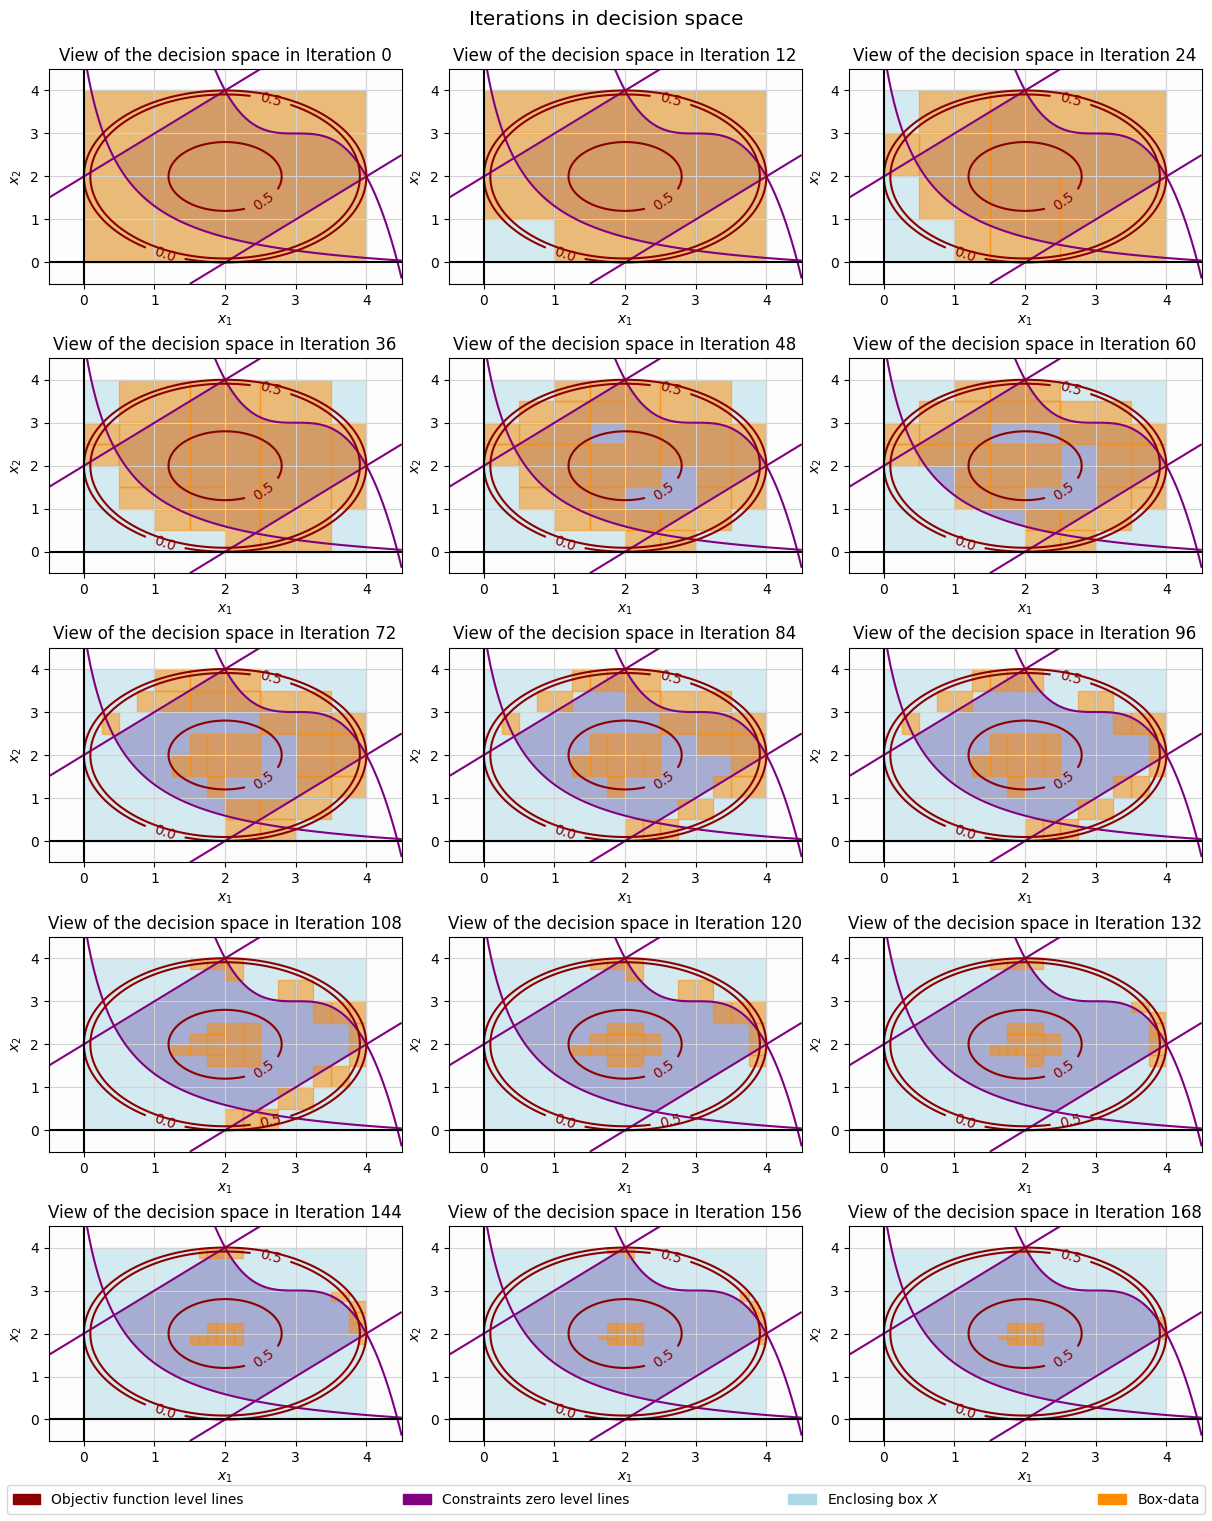

In [21]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/15)]
iterations_in_decision_space_plot(func,cons,X,data_X,iterations,levels=[0,0.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,grad,cons,X,data_X,iterations,dspace=False,xyzlim=[(-0.5,4.5),(-0.5,4.5),(-0.5,2)],figsize=(12,15),facecolor="white")

### TP3 - multiple global solutions with separate feasible set

#### Setting up the optimization problem

In [140]:
def func(x):
    return (x[0]-2)**2+(x[1]-1)**2

def grad(x):
    return obvec([2*(x[0]-2),2*(x[1]-2)])

def cons(x):
    return obvec([-(x[0]+1)**2 +x[1], -(x[0]-2)**2 +x[1], -(x[0]-5)**2 +x[1], 1-x[1]])

def cons_div(x):
    return obmat([[-2*(x[0]+1), -2*(x[0]-2), -2*(x[0]-5),0],[1,1,1,-1]])

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [156]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, grad, cons, cons_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")

#### Outprinting the solver run statistics

In [157]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 69
         2572670 function calls (2531367 primitive calls) in 1.508 seconds

   Ordered by: cumulative time
   List reduced from 121 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004    1.536    1.536 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
     2209    0.021    0.000    1.361    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
      445    0.002    0.000    1.290    0.003 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:17(bounding_omega)
27447/13207    0.025    0.000    1.193    0.000 {built-in method builtins.max}
     2225    0.005    0.000    1.171    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:18(<genexpr>)
    45091    0.157    0.000    1.165    0.000 /Library/Frameworks/Python.framework/Versions/3.9/l

#### Checking for inclusion of the solution set

In [158]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (1,1), s2 = (3,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes),",",any((3 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (1,1), s2 = (3,1)
Inclusion hold: True , True


#### Plotting the solver approximation process

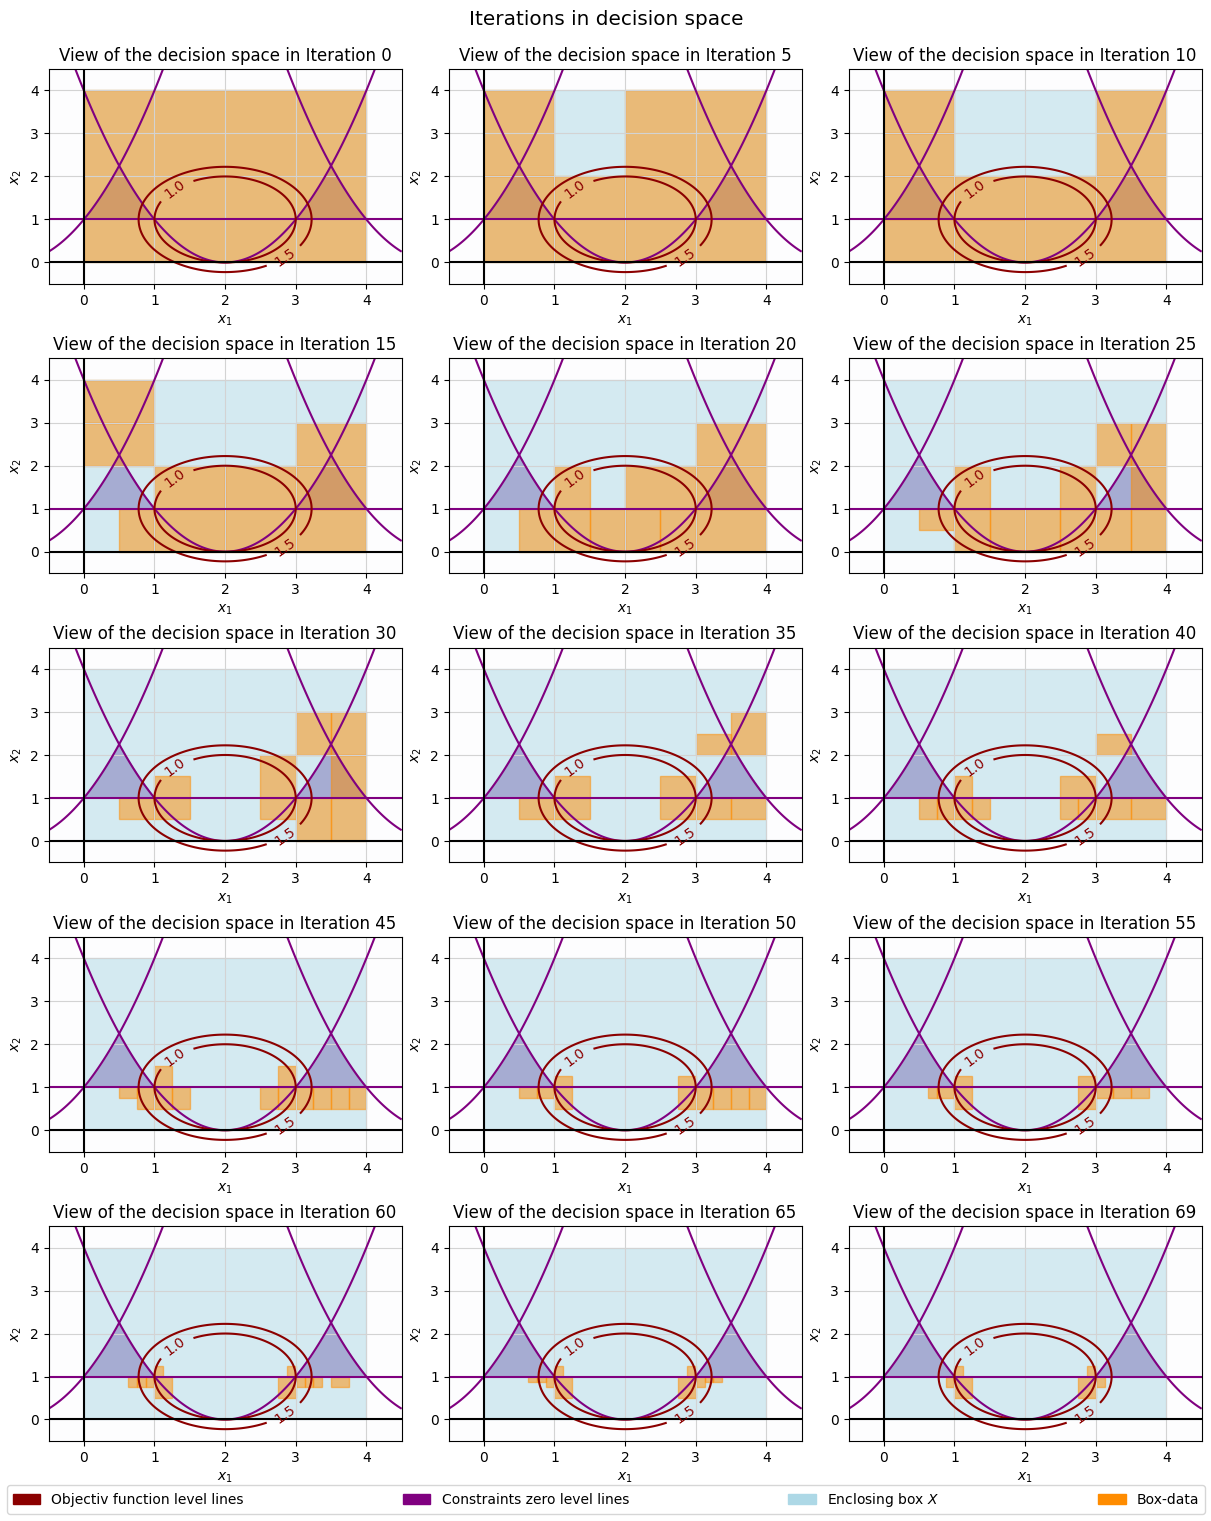

In [160]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/15)]
iterations.append(69)
iterations_in_decision_space_plot(func,cons,X,data_X,iterations,levels=[1,1.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,grad,cons,X,data_X,iterations,dspace=False,xyzlim=[(-0.5,4.5),(-0.5,4.5),(-0.5,2)],figsize=(12,15),facecolor="white")

### TP4 - local minimum and MFC violated 

#### Setting up the optimization problem

In [161]:
def func(x):
    return - x[0]**2 - x[1]**2

def grad(x):
    return obvec([-2*x[0],-2*x[1]])

def cons_MFB(x):
    return obvec([(x[0]-2)**2 + (x[1]-1)**2 -4,(-1/3)*(x[1]-4)**2 +x[0],-x[1] +1])

def cons_MFB_div(x):
    return obmat([[2*(x[0]-2),1,0],[2*(x[1]-1),(-2/3)*(x[1]-4),-1]])

def cons_noMFB(x):
    return obvec([(x[0]-2)**2 + (x[1]-1)**2 -4,(1/9)*(x[0]-3)**3 -1 +x[1],-x[1] +1])

def cons_noMFB_div(x):
    return obmat([[2*(x[0]-2),(1/3)*(x[0]-3)**2,0],[2*(x[1]-1),1,-1]])

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [23]:
with cProfile.Profile() as pr_MFB:
    solution_MFB, k_MFB, save_MFB = improved_BandB(func, grad, cons_MFB, cons_MFB_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr_MFB.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")

In [163]:
with cProfile.Profile() as pr_noMFB:
    solution_noMFB, k_noMFB, save_noMFB = improved_BandB(func, grad, cons_noMFB, cons_noMFB_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 2, delta_max = 0.5, k_max = 5000)

#pr_noMFB.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_noMFB_stats")

#### Outprinting the solver run statistics

In [26]:
print("Iterations needed/done:",k_MFB)
#ps_MFB = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")
ps_MFB = pstats.Stats(pr_MFB)
ps_MFB.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 1723
         84895193 function calls (84063615 primitive calls) in 38.374 seconds

   Ordered by: cumulative time
   List reduced from 120 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.124    0.124   38.884   38.884 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
    49338    0.411    0.000   25.722    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
    12057    0.039    0.000   24.623    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:17(bounding_omega)
9538132/9248764    2.293    0.000   23.832    0.000 {built-in method builtins.max}
   961860    3.057    0.000   23.207    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
   879204    0.789    0.000   22.353    0.000 /Library/Frame

In [164]:
print("Iterations needed/done:",k_noMFB)
#ps_noMFB = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")
ps_noMFB = pstats.Stats(pr_noMFB)
ps_noMFB.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 3335
         226505055 function calls (224893095 primitive calls) in 101.461 seconds

   Ordered by: cumulative time
   List reduced from 123 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.362    0.362  102.527  102.527 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
    95554    0.861    0.000   56.594    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
35555331/34993695    8.207    0.000   56.409    0.000 {built-in method builtins.max}
    23375    0.097    0.000   55.005    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:17(bounding_omega)
  2027441    6.741    0.000   50.778    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    93500    0.182    0.000   47.970    0.001 /Users/ma

#### Checking for inclusion of the solution set

In [27]:
solution_MFB_Boxes = [Oi[0] for Oi in solution_MFB]
print("The optimal solution: s1 = (3,1)")
print("Inclusion MFB hold:",any((3 in Bi[0]) & (1 in Bi[1]) for Bi in solution_MFB_Boxes))
print("The local solution: l1 = (0.7165,2.5339)")
print("Inclusion MFB hold:",any((0.7165 in Bi[0])&(2.5339 in Bi[1]) for Bi in solution_MFB_Boxes))

The optimal solution: s1 = (3,1)
Inclusion MFB hold: True
The local solution: l1 = (0.7165,2.5339)
Inclusion MFB hold: False


In [165]:
solution_noMFB_Boxes = [Oi[0] for Oi in solution_noMFB]
print("The optimal solution: s1 = (3,1)")
print("Inclusion no MFB hold:",any((3 in Bi[0]) & (1 in Bi[1]) for Bi in solution_noMFB_Boxes))
print("The local solution: l1 = (0.7165,2.5339)")
print("Inclusion no MFB hold:",any((0.7165 in Bi[0])&(2.5339 in Bi[1]) for Bi in solution_noMFB_Boxes))

The optimal solution: s1 = (3,1)
Inclusion no MFB hold: True
The local solution: l1 = (0.7165,2.5339)
Inclusion no MFB hold: False


#### Plotting the solver approximation process

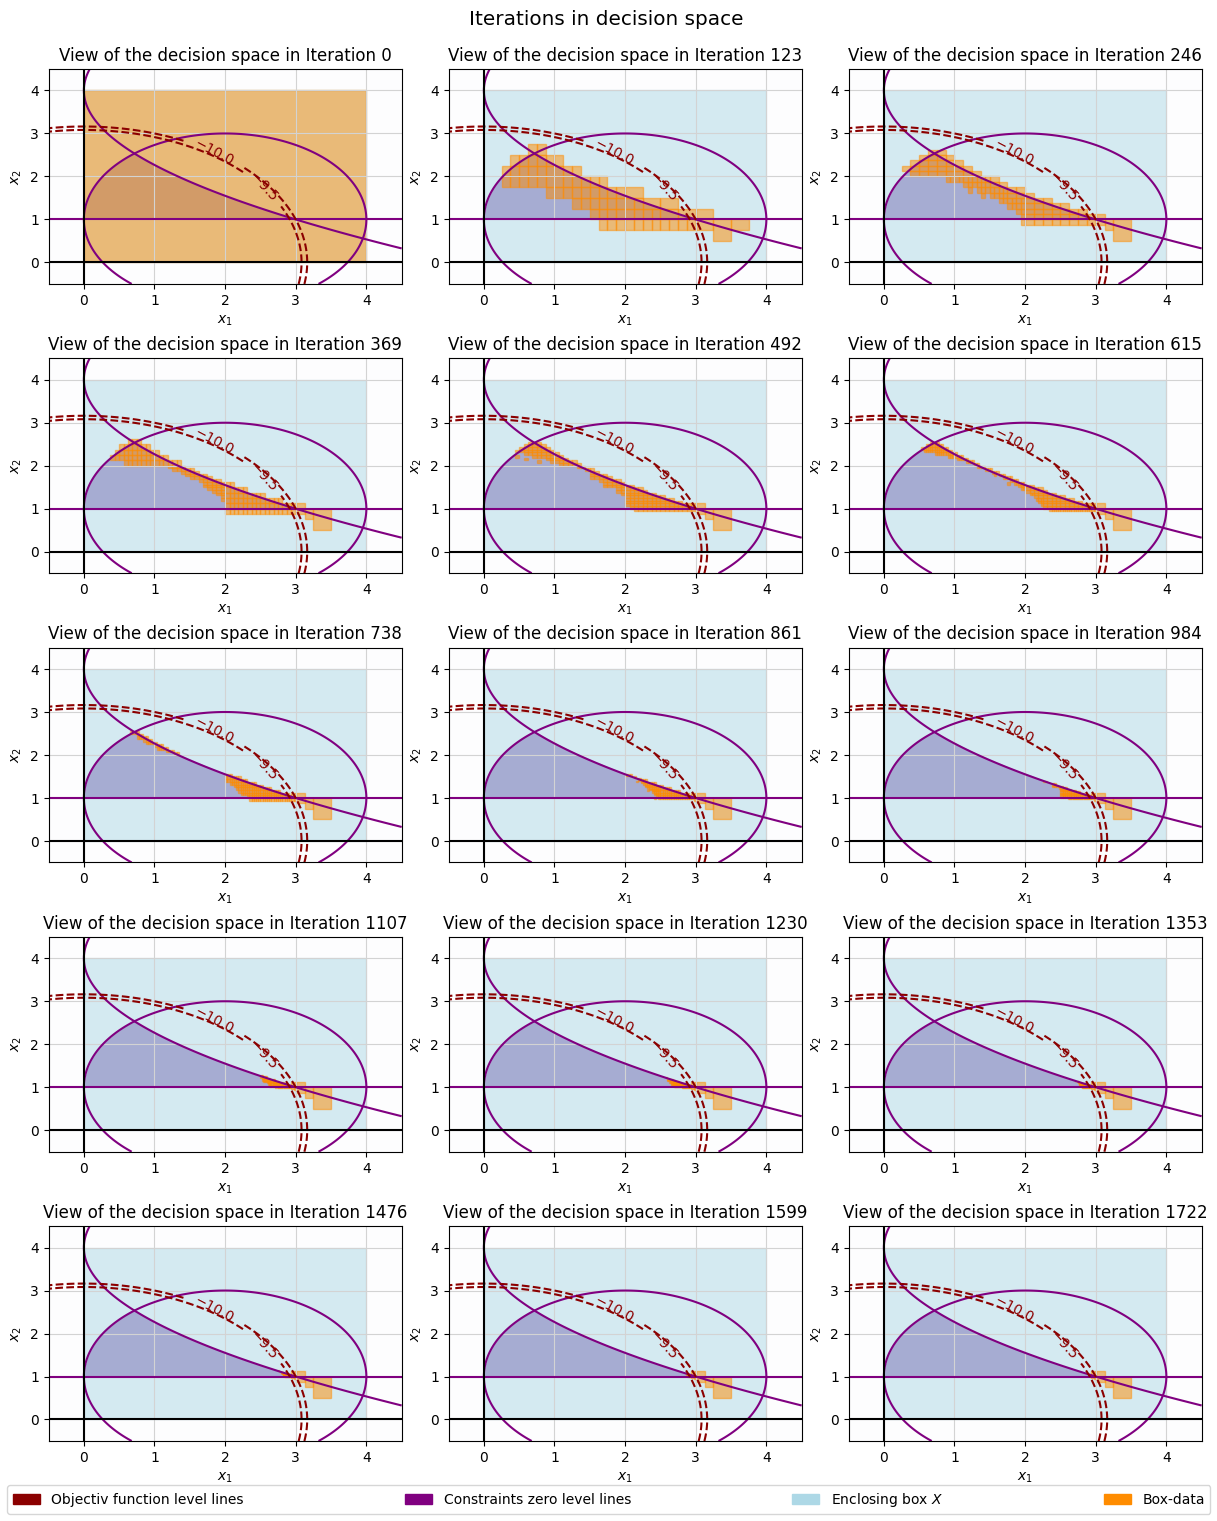

In [32]:
data_X = dict(zip(save_MFB.keys(),[[Oi[0] for Oi in save_MFB[k][0]] for k in save_MFB]))
iterations = list(data_X.keys())[::round(k_MFB/14)]
iterations_in_decision_space_plot(func,cons_MFB,X,data_X,iterations,levels=[-10,-9.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,grad,cons_MFB,X,data_X,iterations,figsize=(12,15),facecolor="white")

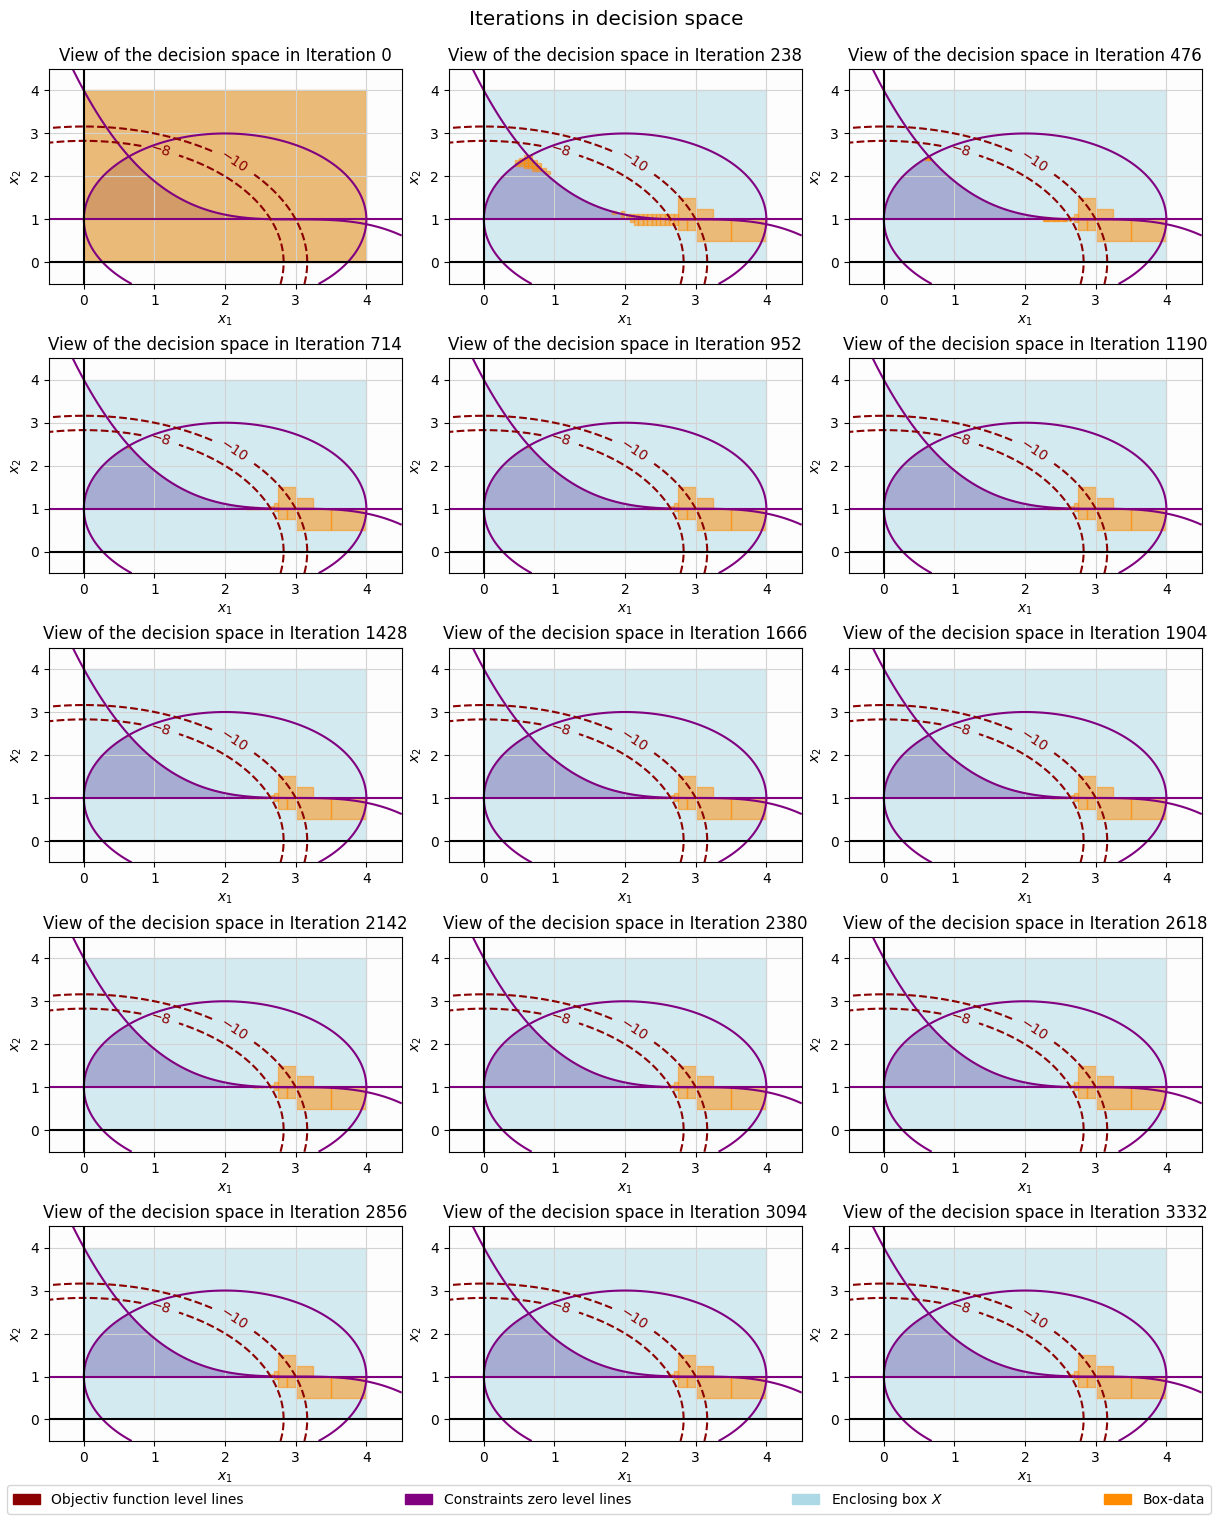

In [166]:
data_X = dict(zip(save_noMFB.keys(),[[Oi[0] for Oi in save_noMFB[k][0]] for k in save_noMFB]))
iterations = list(data_X.keys())[::round(k_noMFB/14)]
iterations_in_decision_space_plot(func,cons_noMFB,X,data_X,iterations,levels=[-10,-8],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,grad,cons_MFB,X,data_X,iterations,figsize=(12,15),facecolor="white")

### TP5 - spurious Points

#### Setting up the optimization problem

In [181]:
def func(x):
    return x[0] + x[1]

def grad(x):
    return obvec([1,1])

def cons(x):
    return obvec([-(x[0]-1)**2 +x[1]-1, x[0] -x[1], (x[0]-2)**2 +(x[1]-2)**2 -2])

def cons_div(x):
    return obmat([[-2*(x[0]-1), 1, 2*(x[0]-2)],[1, -1, 2*(x[1]-2)]])

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [184]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, grad, cons, cons_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr_MFB.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")

#### Outprinting the solver run statistics

In [185]:
print("Iterations needed/done:",k)
#ps_MFB = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 267
         8727533 function calls (8584456 primitive calls) in 4.896 seconds

   Ordered by: cumulative time
   List reduced from 120 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.016    0.016    4.982    4.982 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
     1919    0.007    0.000    4.159    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:17(bounding_omega)
     7604    0.071    0.000    4.092    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
242903/196847    0.109    0.000    3.755    0.000 {built-in method builtins.max}
     7676    0.016    0.000    3.655    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:18(<genexpr>)
   146886    0.491    0.000    3.623    0.000 /Library/Frameworks/Python.framework/Versions/3.

#### Checking for inclusion of the solution set

In [186]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution P: s1 = (1,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes))
print("The optimal solution P_<: l1 = (2,2)")
print("Inclusion hold:",any((2 in Bi[0])&(2 in Bi[1]) for Bi in solution_Boxes))

The optimal solution P: s1 = (1,1)
Inclusion hold: True
The optimal solution P_<: l1 = (2,2)
Inclusion hold: True


#### Plotting the solver approximation process

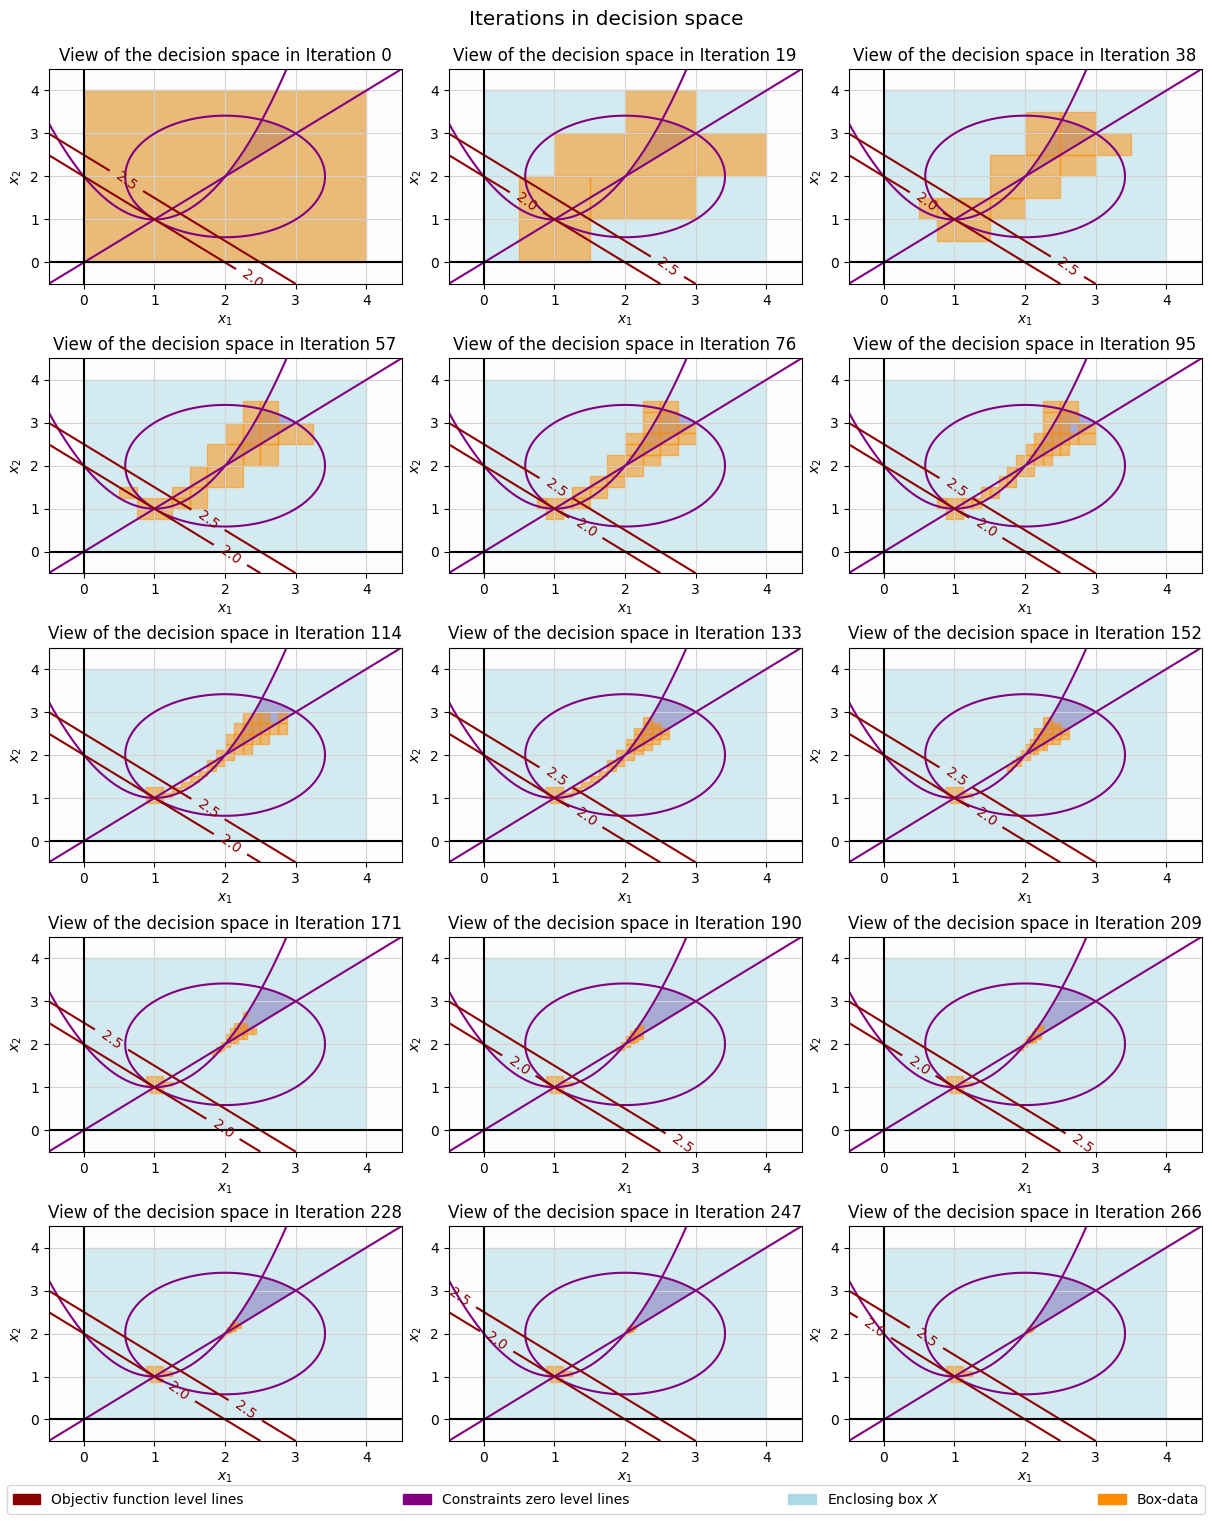

In [187]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/14)]
iterations_in_decision_space_plot(func,cons,X,data_X,iterations,levels=[2,2.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,grad,cons_MFB,X,data_X,iterations,figsize=(12,15),facecolor="white")

### TP6 - Various testfunctions (box constrained) from Eichfelder

#### Setting up the optimization problems

In [2]:
def easom_func(x):
    return -cos(x[0])*cos(x[1])*exp(-(x[0] -np.pi)**2 -(x[1] -np.pi)**2)

def easom_grad(x):
    return obvec([(sin(x[0]) +2*x[0]*cos(x[0])-2*np.pi*cos(x[0]))*cos(x[1])*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2),(sin(x[1]) +2*x[1]*cos(x[1])-2*np.pi*cos(x[1]))*cos(x[0])*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2)])

easom_X = intvec([[-100,100],[-100,100]])

def rastrigin_func(x):
    return 20 +x[0]**2 +x[1]**2 -10*(cos(2*np.pi*x[0]) +cos(2*np.pi*x[1]))

def rastrigin_grad(x):
    return obvec([2*x[0] +20*sin(2*np.pi*x[0])*np.pi, 2*x[1] +20*sin(2*np.pi*x[1])*np.pi])

rastrigin_X = intvec([[-5.12,5.12],[-5.12,5.12]])

def hump_func(x):
    return (4 -2.1*x[0]**2 +(1/3)*x[0]**4)*x[0]**2 +x[0]*x[1] -(4 -4*x[1]**2)*x[1]**2

def hump_grad(x):
    return obvec([8*x[0] -8.4*x[0]**3 +2*x[0]**5 +x[1], x[0] -8*x[1] +16*x[1]**3])

hump_X = intvec([[-1.9,1.9],[-1.1,1.1]])

def branin_func(x):
    return (x[1] -(5.1/(4*np.pi**2))*x[0]**2 +(5/np.pi)*x[0] -6)**2 +10*(1-(1/(8*np.pi)))*cos(x[0]) +10

def branin_grad(x):
    return obvec([2*(x[1] -(5.1/(4*np.pi**2))*x[0]**2 +(5/np.pi)*x[0] -6)*(-(5.1/(2*np.pi**2))*x[0] +(5/np.pi)) -10*(1-(1/(8*np.pi)))*sin(x[0]), 2*(x[1] -(5.1/(4*np.pi**2))*x[0]**2 +(5/np.pi)*x[0] -6)])

branin_X = intvec([[-5,10],[0,15]])

def himmelblau_func(x):
    return (x[0]**2 +x[1] -11)**2 + (x[0] +x[1]**2 -7)**2

def himmelblau_grad(x):
    return obvec([4*(x[0]**2 +x[1] -11)*x[0] +2*(x[0] +x[1]**2 -7), 2*(x[0]**2 +x[1] -11) +4*(x[0] +x[1]**2 -7)*x[1]])

himmelblau_X = intvec([[-6,6],[-6,6]])

def rastrigin_mod_func(x):
    return 20 +x[0]**2 +x[1]**2 +10*(cos(2*np.pi*x[0]) +cos(2*np.pi*x[1]))

def rastrigin_mod_grad(x):
    return obvec([2*x[0] -20*sin(2*np.pi*x[0])*np.pi, 2*x[1] -20*sin(2*np.pi*x[1])*np.pi])

rastrigin_mod_X = intvec([[-5.12,5.12],[-5.12,5.12]])

def shubert_func(x):
    return sum(i *cos((i +1)*x[0] +i) for i in range(1,6)) *sum(j *cos((j +1)*x[1] +j) for j in range(1,6))

def shubert_grad(x):
    return obvec([sum(-i *sin((i +1)*x[0] +i) *(i +1) for i in range(1,6)) *sum(j *cos((j +1)*x[1] +j) for j in range(1,6)), sum(-j *sin((j +1)*x[1] +j) *(j +1) for j in range(1,6)) *sum(i *cos((i +1)*x[0] +i) for i in range(1,6))])

shubert_X = intvec([[-10,10],[-10,10]])

def sinN(n,x):
    return (-cos(0.5*np.pi +x))**n

def deb1_func(x):
    return -0.5*(sinN(6,5*np.pi*x[0]) + sinN(6,5*np.pi*x[1]))

def deb1_grad(x):
    return obvec([-47.1239 *sinN(5,5*np.pi*x[0])*cos(5*np.pi*x[0]), -47.1239 *sinN(5,5*np.pi*x[1])*cos(5*np.pi*x[1])])

deb1_X = intvec([[0,1],[0,1]])

def vincent_func(x):
    return -0.5*(sin(10*log(x[0])) +sin(10*log(x[1])))

def vincent_grad(x):
    return obvec([-(5/x[0])*cos(10*log(x[0])), -(5/x[1])*cos(10*log(x[1]))])

vincent_X = intvec([[0.25,10],[0.25,10]])

# def cons(x,x_inf, x_sup):
#     return obvec([x[0]-x_sup[0], x[1]-x_sup[1],x_inf[0]-x[0],x_inf[1]-x[1]])

# def cons_div(x,x_inf, x_sup):
#     return obmat([[1,0,-1,0],[0,1,0,-1]])

#### Applying the solver to the optimization problem

In [3]:
with cProfile.Profile() as easom_pr:
    easom_solution, easom_k, easom_save = improved_boxres_BandB(easom_func, easom_grad, easom_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#easom_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_easom_stats")

In [16]:
with cProfile.Profile() as rastrigin_pr:
    rastrigin_solution, rastrigin_k, rastrigin_save = improved_boxres_BandB(rastrigin_func, rastrigin_grad, rastrigin_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#rastrigin_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_rastrigin_stats")

In [17]:
with cProfile.Profile() as hump_pr:
    hump_solution, hump_k, hump_save = improved_boxres_BandB(hump_func, hump_grad, hump_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#hump_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_hump_stats")

In [64]:
with cProfile.Profile() as branin_pr:
    branin_solution, branin_k, branin_save = improved_boxres_BandB(branin_func, branin_grad, branin_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#branin_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_branin_stats")

In [3]:
with cProfile.Profile() as himmelblau_pr:
    himmelblau_solution, himmelblau_k, himmelblau_save = improved_boxres_BandB(himmelblau_func, himmelblau_grad, himmelblau_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#himmelblau_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_himmelblau_stats")

In [21]:
with cProfile.Profile() as rastrigin_mod_pr:
    rastrigin_mod_solution, rastrigin_mod_k, rastrigin_mod_save = improved_boxres_BandB(rastrigin_mod_func, rastrigin_mod_grad, rastrigin_mod_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#rastrigin_mod_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_rastrigin_mod_stats")

In [41]:
with cProfile.Profile() as shubert_pr:
    shubert_solution, shubert_k, shubert_save = improved_boxres_BandB(shubert_func, shubert_grad, shubert_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#shubert_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_shubert_stats")

In [55]:
with cProfile.Profile() as deb1_pr:
    deb1_solution, deb1_k, deb1_save = improved_boxres_BandB(deb1_func, deb1_grad, deb1_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#deb1_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_deb1_stats")

In [65]:
with cProfile.Profile() as vincent_pr:
    vincent_solution, vincent_k, vincent_save = improved_boxres_BandB(vincent_func, vincent_grad, vincent_X, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#vincent_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_vincent_stats")

#### Outprinting the solver run statistics

In [4]:
print("Iterations needed/done:",easom_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_easom_stats")
ps = pstats.Stats(easom_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 100
         2504169 function calls (2486334 primitive calls) in 1.453 seconds

   Ordered by: cumulative time
   List reduced from 120 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004    1.466    1.466 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
      615    0.009    0.000    1.416    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
     1230    0.036    0.000    1.247    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_47337/320725569.py:4(easom_grad)
    48384    0.162    0.000    1.194    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    48384    0.064    0.000    0.981    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__ini

In [26]:
print("Iterations needed/done:",rastrigin_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_rastrigin_stats")
ps = pstats.Stats(rastrigin_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 824
         11863346 function calls (11779177 primitive calls) in 5.876 seconds

   Ordered by: cumulative time
   List reduced from 95 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.029    0.029    5.922    5.922 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
     4951    0.059    0.000    4.992    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
   151832    0.495    0.000    4.388    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     9902    0.090    0.000    3.784    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_47337/320725569.py:12(rastrigin_grad)
   151832    0.199    0.000    3.738    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval

In [27]:
print("Iterations needed/done:",hump_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_hump_stats")
ps = pstats.Stats(hump_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 216
         2390785 function calls (2372375 primitive calls) in 1.345 seconds

   Ordered by: cumulative time
   List reduced from 98 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    1.363    1.363 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
     1315    0.016    0.000    1.239    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
    42962    0.145    0.000    1.068    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     2630    0.027    0.000    0.963    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_47337/320725569.py:20(hump_grad)
    34190    0.032    0.000    0.900    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init

In [65]:
print("Iterations needed/done:",branin_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_branin_stats")
ps = pstats.Stats(branin_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 223
         3761535 function calls (3729772 primitive calls) in 2.967 seconds

   Ordered by: cumulative time
   List reduced from 110 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.014    0.014    3.001    3.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
     1381    0.025    0.000    2.806    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
    64460    0.311    0.000    2.379    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     2762    0.077    0.000    2.304    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_47337/1877675374.py:28(branin_grad)
    53859    0.073    0.000    2.007    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__

In [4]:
print("Iterations needed/done:",himmelblau_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_himmelblau_stats")
ps = pstats.Stats(himmelblau_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 257
         3628007 function calls (3612299 primitive calls) in 2.787 seconds

   Ordered by: cumulative time
   List reduced from 97 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.014    0.014    2.829    2.829 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
     1571    0.027    0.000    2.607    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
    73322    0.348    0.000    2.309    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     3142    0.073    0.000    2.162    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_1139/1877675374.py:36(himmelblau_grad)
    59698    0.082    0.000    1.950    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/

In [22]:
print("Iterations needed/done:",rastrigin_mod_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_rastrigin_mod_stats")
ps = pstats.Stats(rastrigin_mod_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 1008
         15302276 function calls (15175115 primitive calls) in 7.462 seconds

   Ordered by: cumulative time
   List reduced from 98 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.035    0.035    7.519    7.519 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
     6055    0.069    0.000    6.259    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
   185688    0.609    0.000    5.375    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    12110    0.107    0.000    4.800    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_1139/1877675374.py:44(rastrigin_mod_grad)
   185688    0.240    0.000    4.579    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyint

In [42]:
print("Iterations needed/done:",shubert_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_shubert_stats")
ps = pstats.Stats(shubert_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 2500
         281582090 function calls (281268493 primitive calls) in 129.637 seconds

   Ordered by: cumulative time
   List reduced from 102 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.168    0.168  132.509  132.509 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
    18447    0.240    0.000  119.003    0.006 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
    36894    0.271    0.000  113.572    0.003 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_1139/1877675374.py:52(shubert_grad)
   217916    0.985    0.000  111.999    0.001 {built-in method builtins.sum}
  4256256   12.197    0.000  108.198    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
  4256256    5.213    0.000   91.966    0.000 /Librar

In [56]:
print("Iterations needed/done:",deb1_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_deb1_stats")
ps = pstats.Stats(deb1_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 714
         12550191 function calls (12457094 primitive calls) in 6.607 seconds

   Ordered by: cumulative time
   List reduced from 109 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.028    0.028    6.650    6.650 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
     4433    0.050    0.000    5.860    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
   171458    0.555    0.000    5.029    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     8866    0.082    0.000    4.755    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_1139/1877675374.py:63(deb1_grad)
   171458    0.235    0.000    4.297    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__i

In [66]:
print("Iterations needed/done:",vincent_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_vincent_stats")
ps = pstats.Stats(vincent_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 2065
         40231716 function calls (39957891 primitive calls) in 34.340 seconds

   Ordered by: cumulative time
   List reduced from 110 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.221    0.221   34.502   34.502 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
    13039    0.328    0.000   25.245    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
   452234    2.909    0.000   20.131    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    26078    0.493    0.000   18.957    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_1139/1877675374.py:71(vincent_grad)
   452234    1.050    0.000   16.385    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterva

#### Checking for inclusion of the solution set

In [ ]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution of F2: s1 = (1,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes))

The optimal solution of F2: s1 = (1,1)
Inclusion hold: True


#### Plotting the solver approximation process

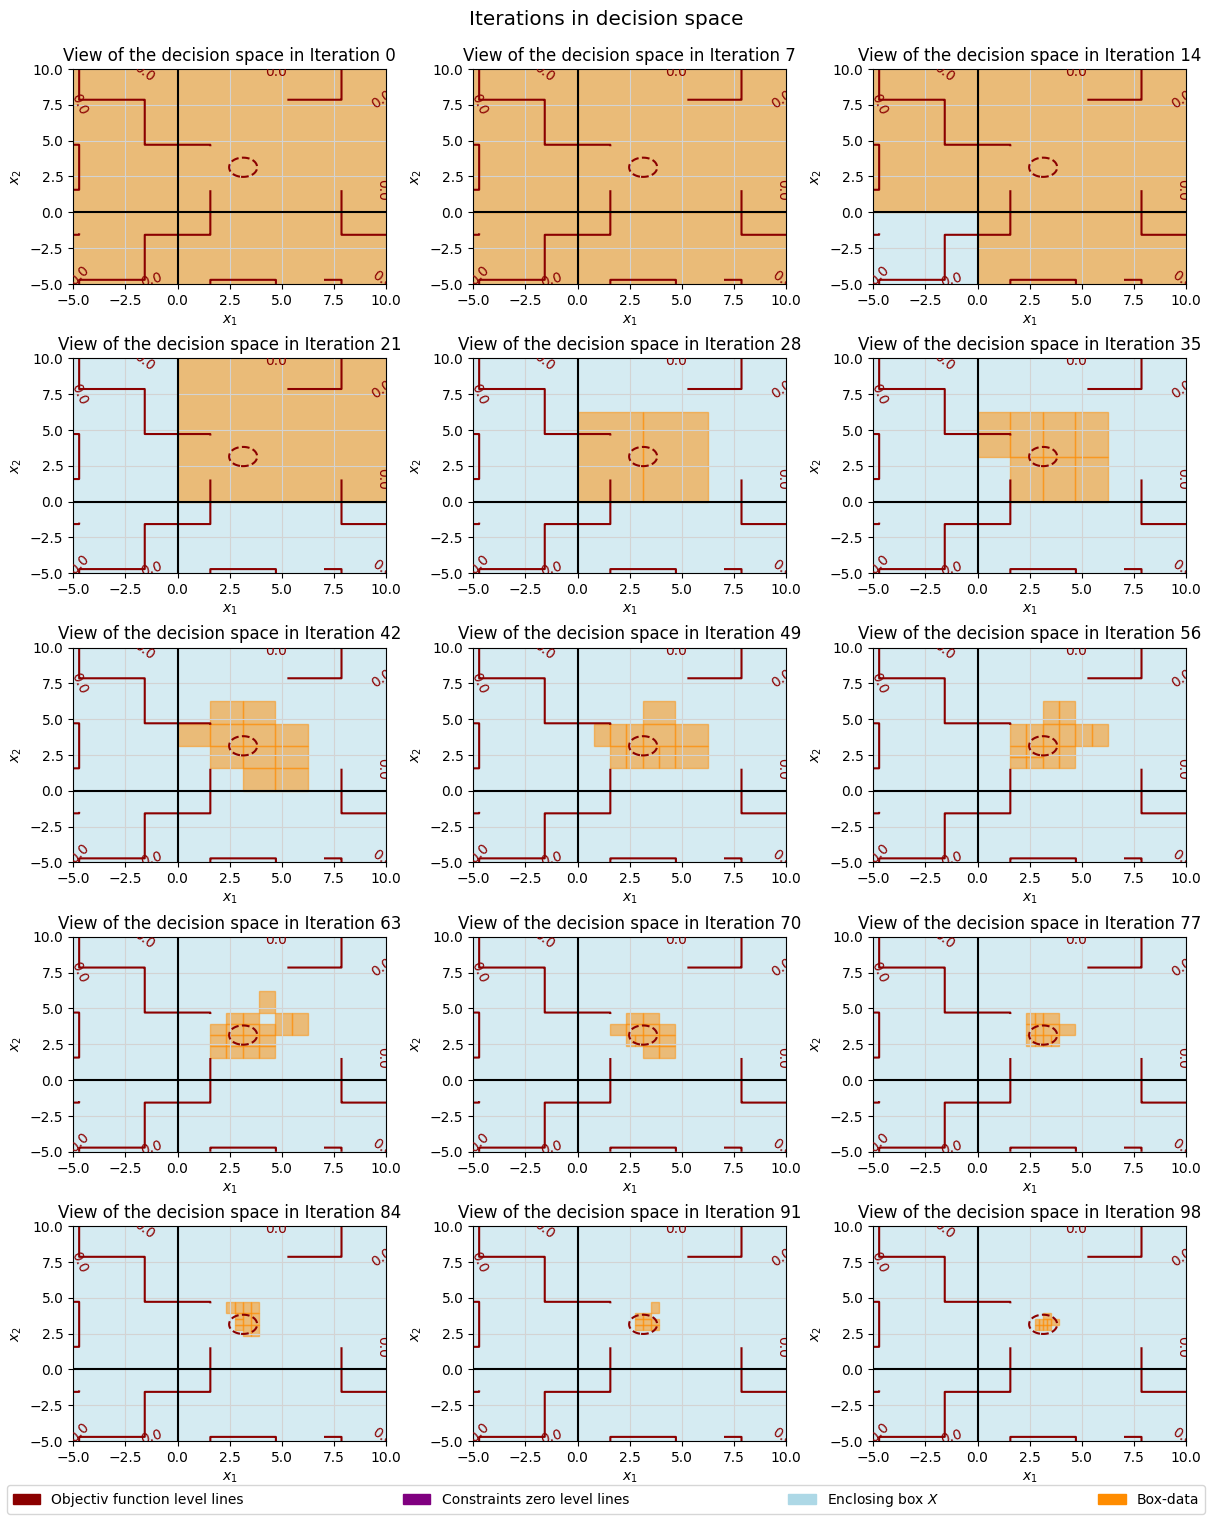

In [15]:
data_X = dict(zip(easom_save.keys(),[[Oi[0] for Oi in easom_save[k][0]] for k in easom_save]))
iterations = list(data_X.keys())[::round(easom_k/14)]
iterations_in_decision_space_plot(easom_func,None,easom_X,data_X,iterations,levels=[-1,-0.5,0],mgres=50,xylim=[(-5,10),(-5,10)],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(easom_func,None,None,easom_X,data_X,iterations,dspace=False,mgres=50,xyzlim=[(-5,10),(-5,10),(-1,1)],figsize=(12,15),facecolor="white")

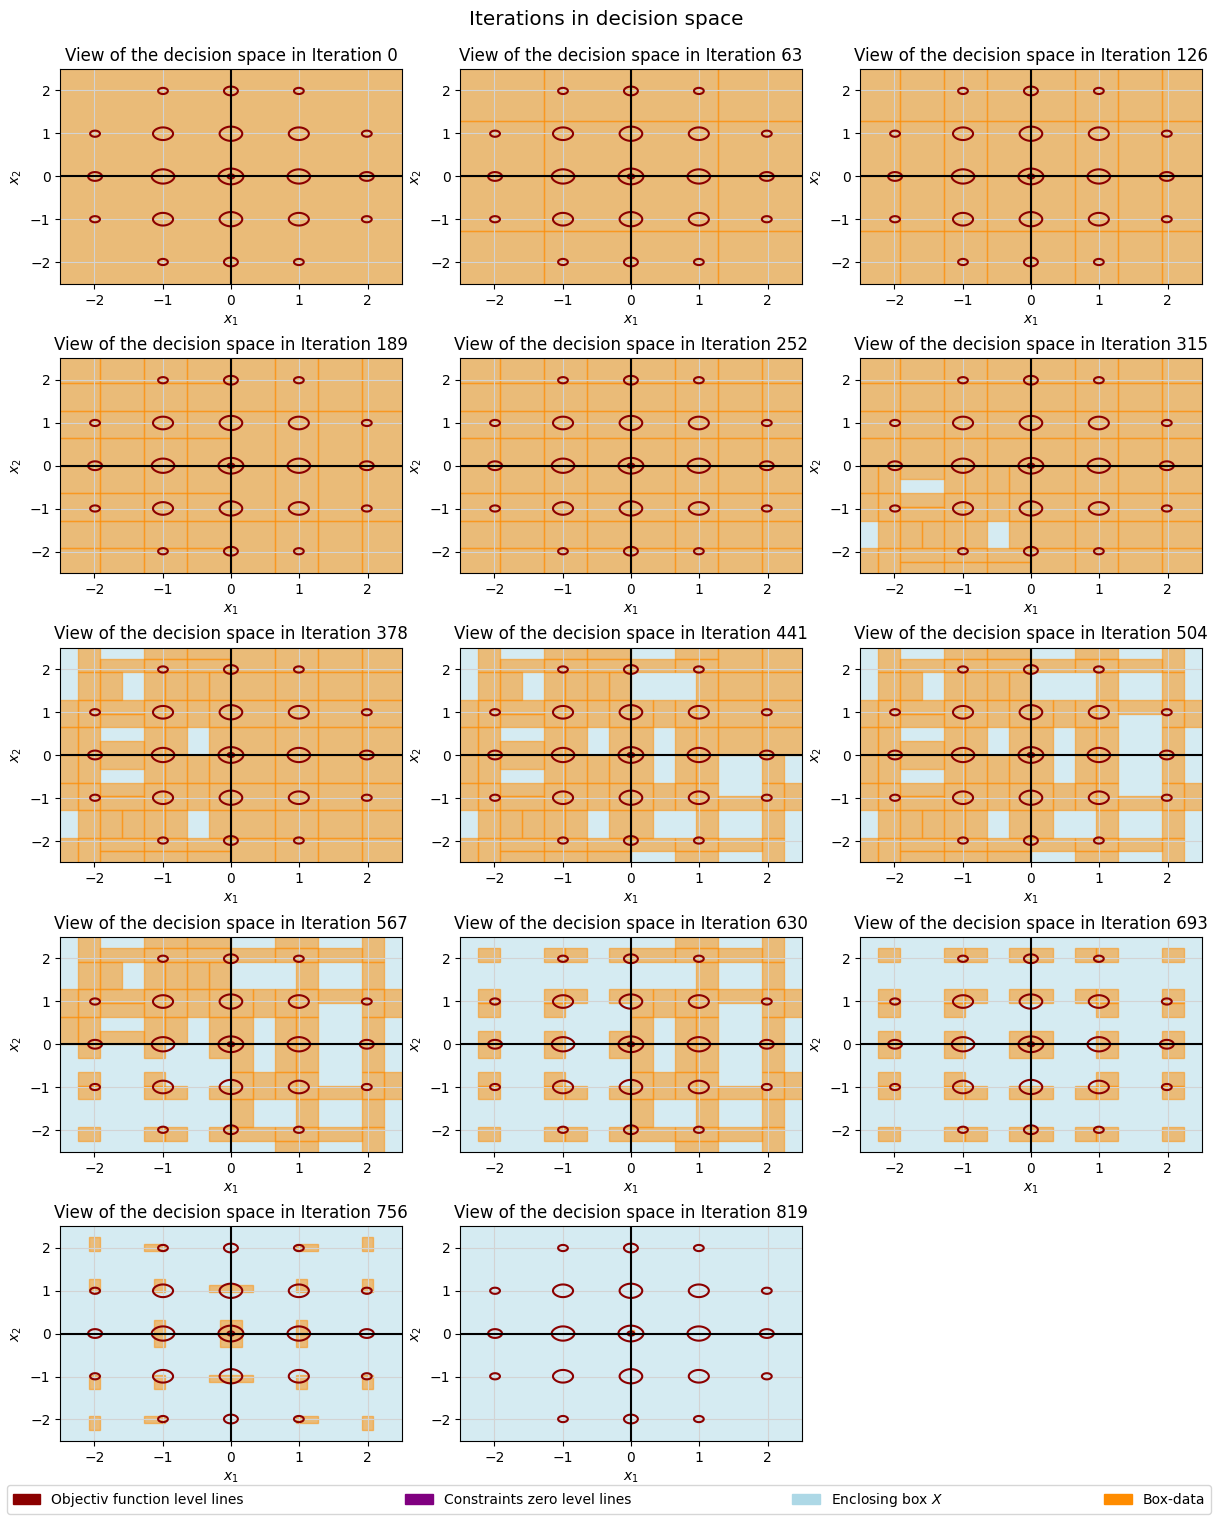

In [54]:
data_X = dict(zip(rastrigin_save.keys(),[[Oi[0] for Oi in rastrigin_save[k][0]] for k in rastrigin_save]))
iterations = list(data_X.keys())[::round(rastrigin_k/13)]
iterations_in_decision_space_plot(rastrigin_func,None,rastrigin_X,data_X,iterations,levels=[0,0.5,6],mgres=50,xylim=[(-2.5,2.5),(-2.5,2.5)],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(rastrigin_func,None,None,rastrigin_X,data_X,iterations,dspace=False,mgres=50,xyzlim=[(-2.5,2.5),(-2.5,2.5),(0,40)],figsize=(12,15),facecolor="white")

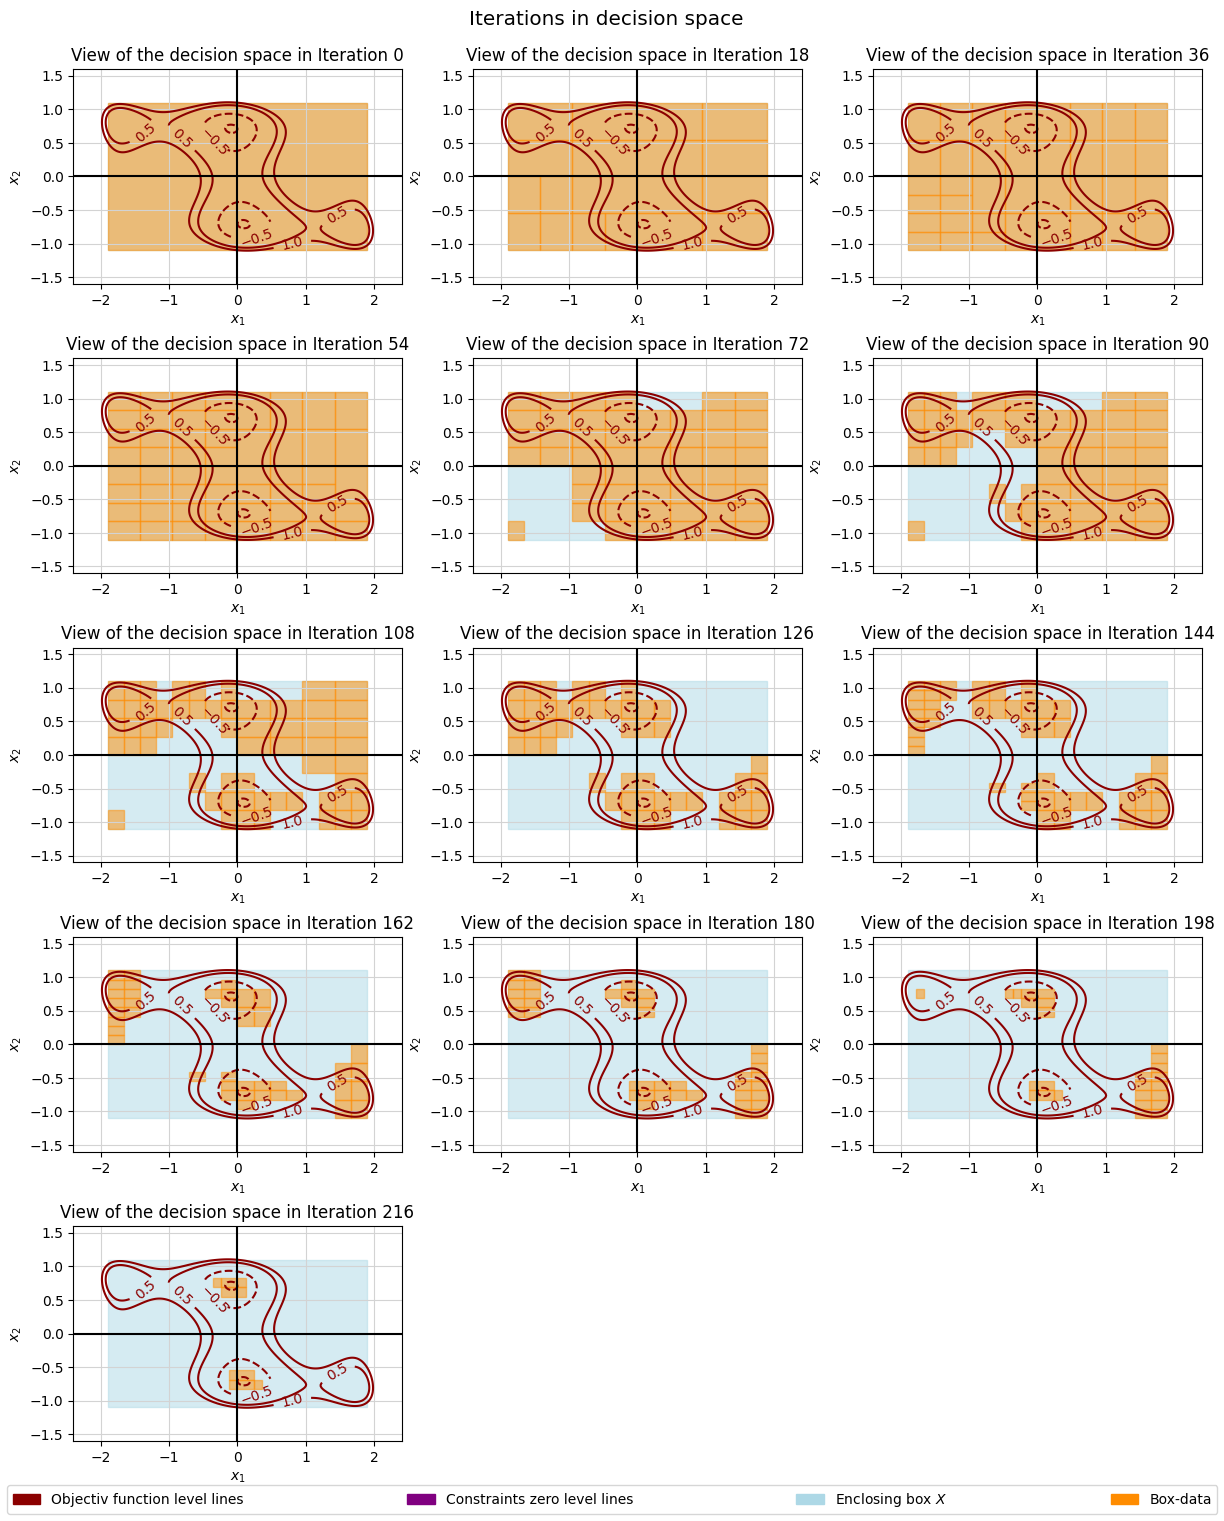

In [60]:
data_X = dict(zip(hump_save.keys(),[[Oi[0] for Oi in hump_save[k][0]] for k in hump_save]))
iterations = list(data_X.keys())[::round(hump_k/12)]
iterations_in_decision_space_plot(hump_func,None,hump_X,data_X,iterations,levels=[-1,-0.5,0.5,1],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(hump_func,None,None,hump_X,data_X,iterations,dspace=False,mgres=50,figsize=(12,15),facecolor="white")

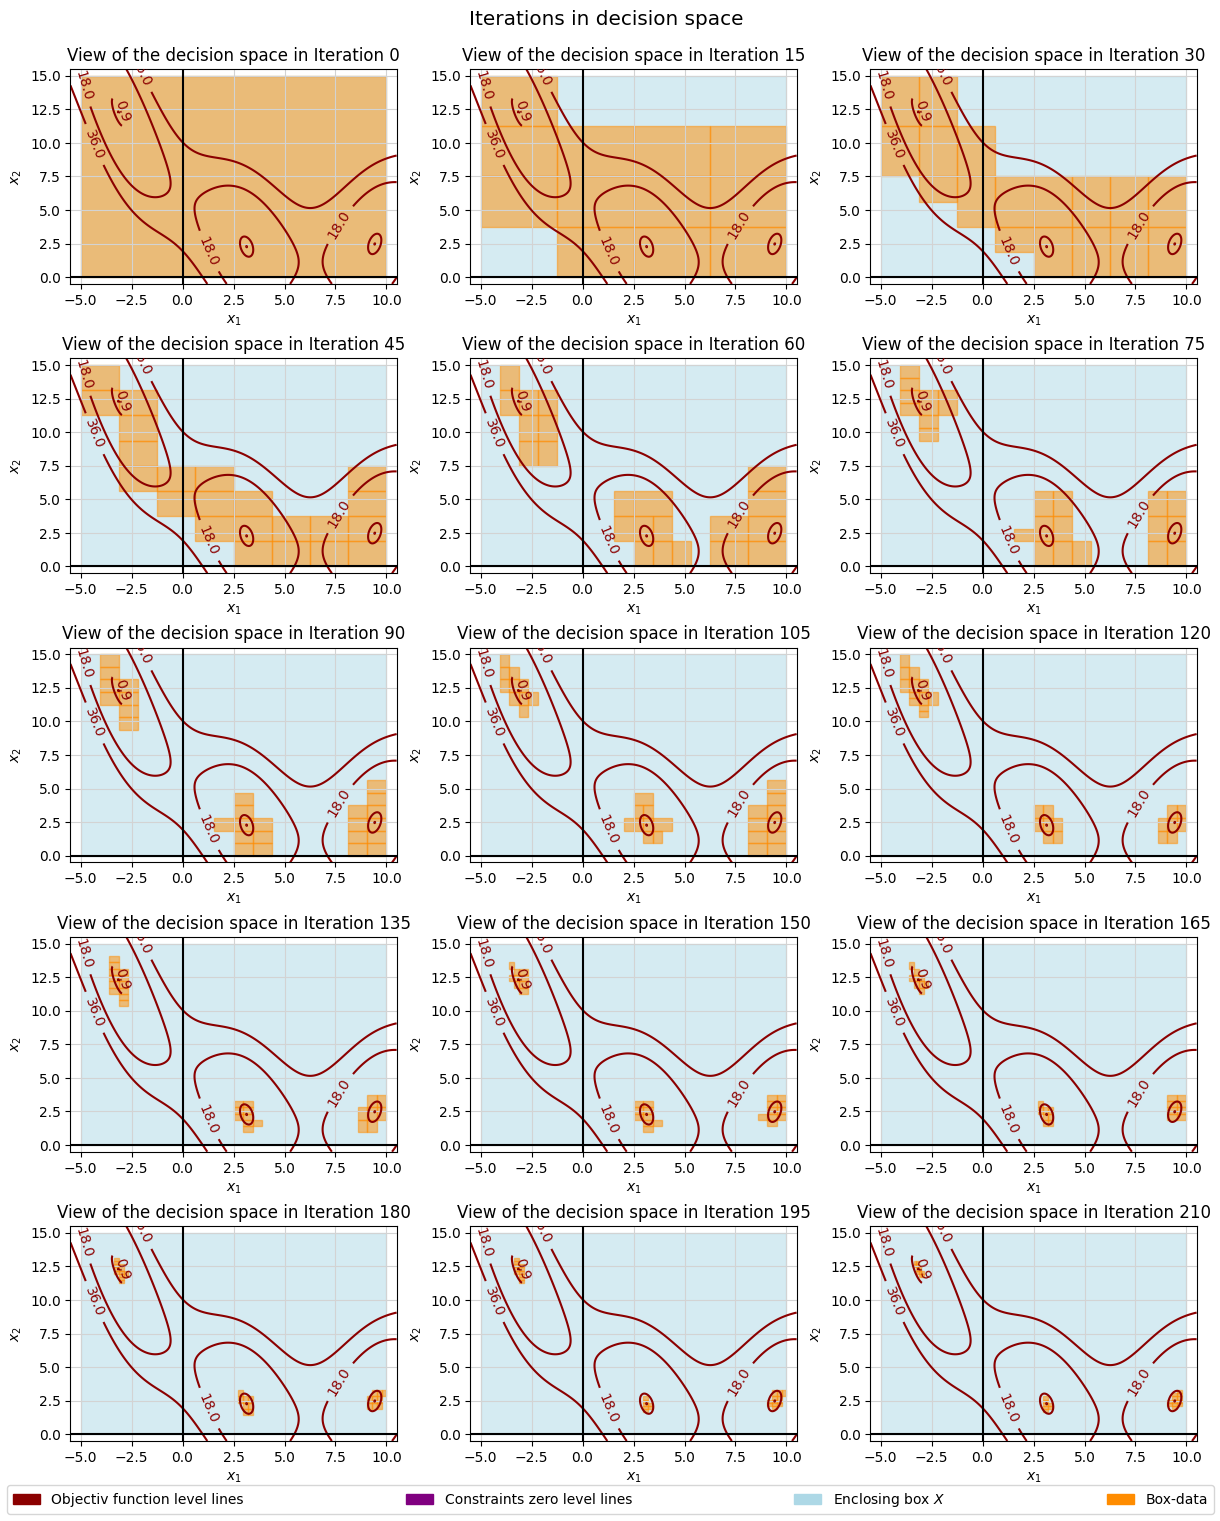

In [77]:
data_X = dict(zip(branin_save.keys(),[[Oi[0] for Oi in branin_save[k][0]] for k in branin_save]))
iterations = list(data_X.keys())[::round(branin_k/15)]
iterations_in_decision_space_plot(branin_func,None,branin_X,data_X,iterations,levels=[0.4,0.9,18,36],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(branin_func,None,None,branin_X,data_X,iterations,dspace=True,mgres=50,figsize=(12,15),facecolor="white")

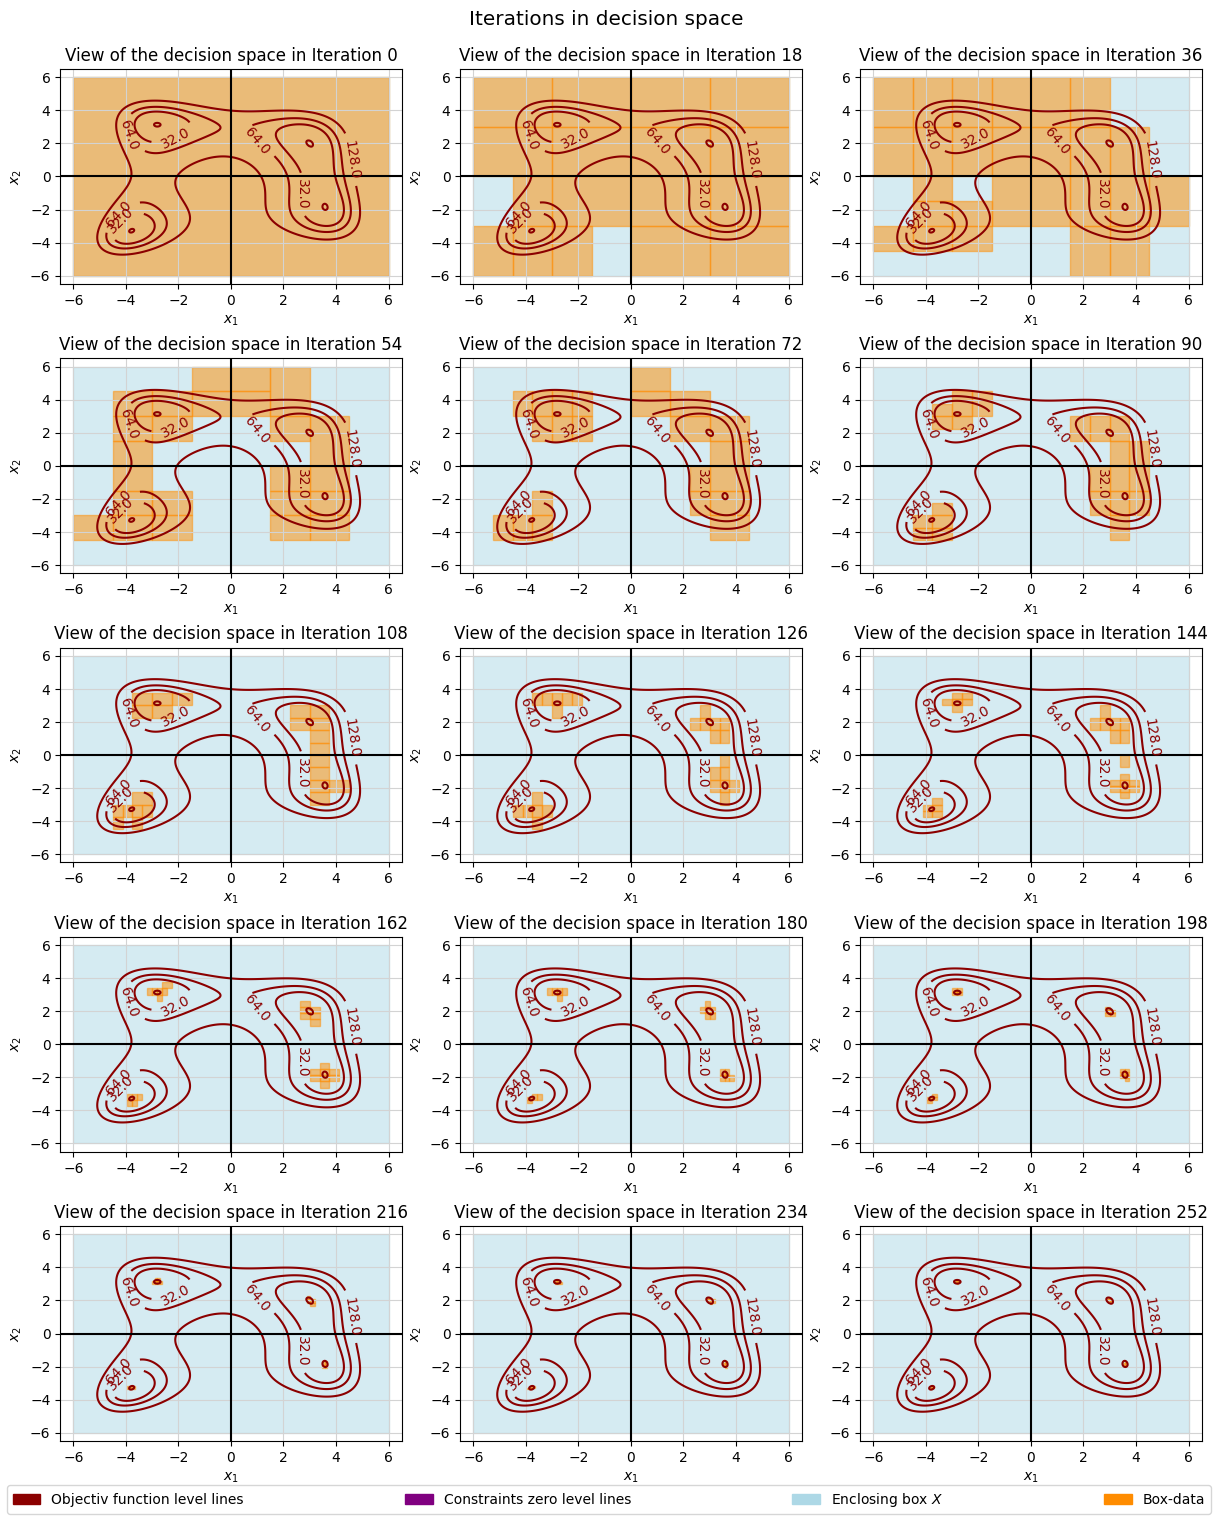

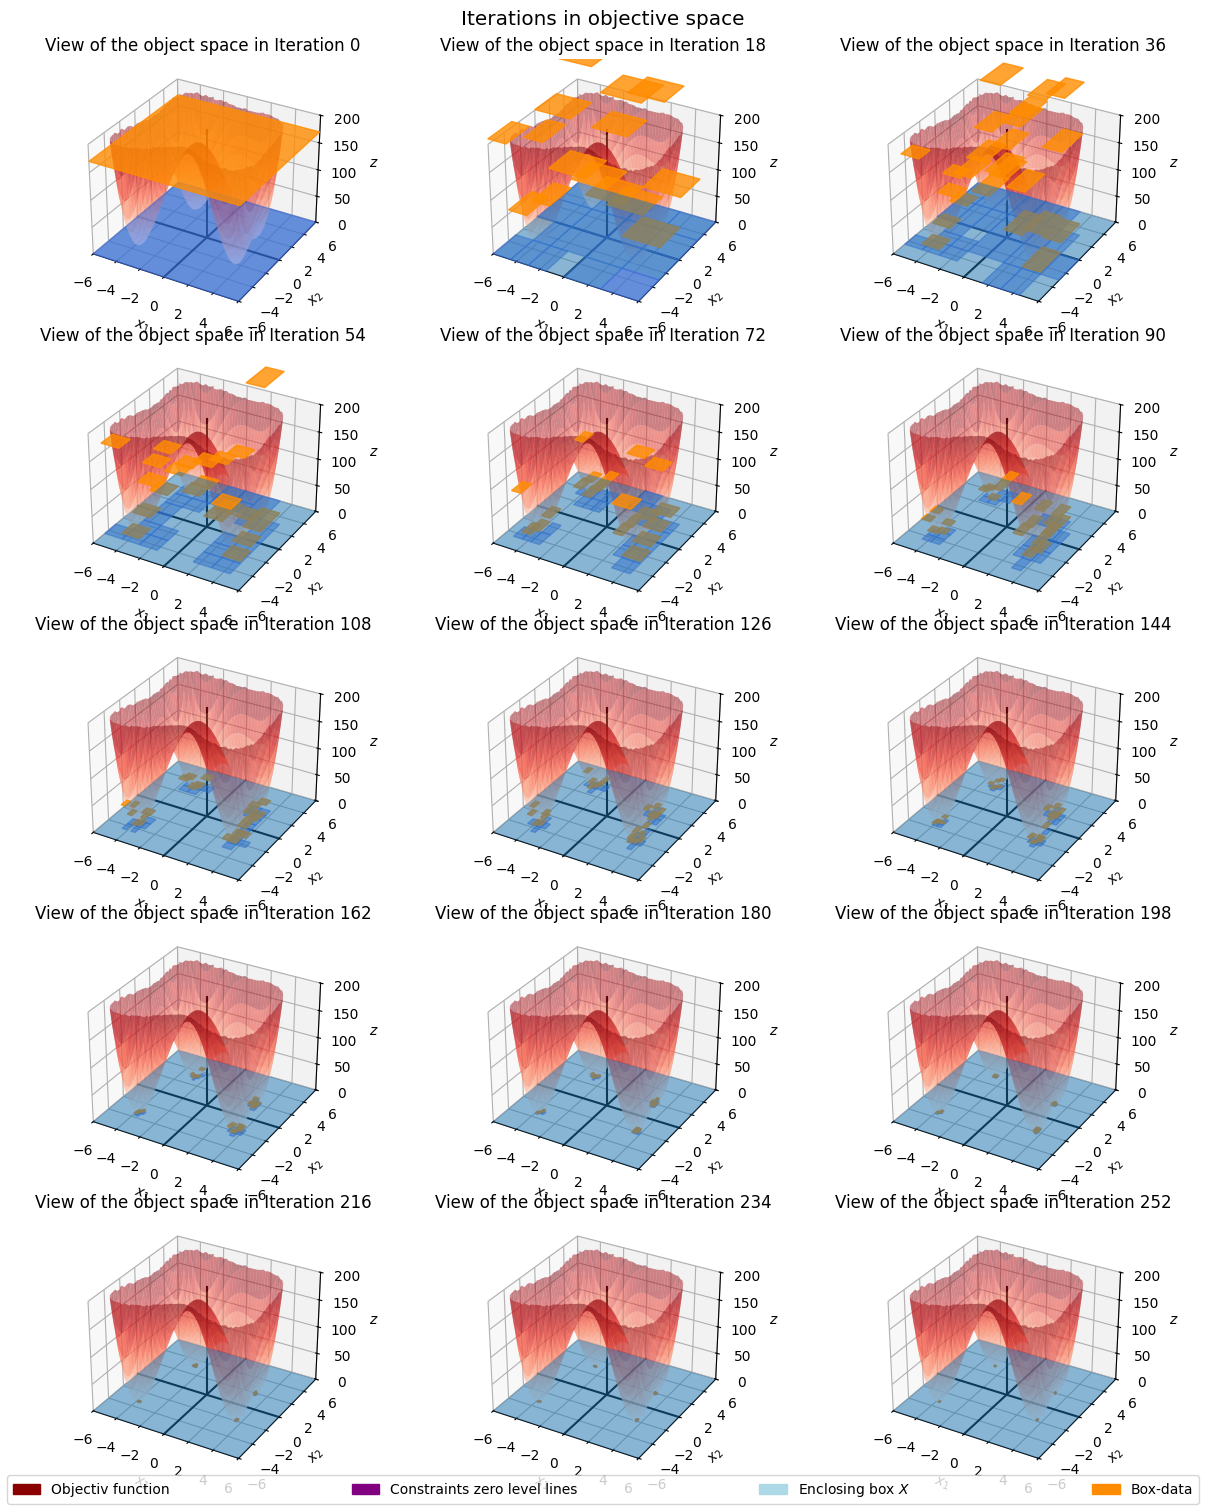

In [19]:
data_X = dict(zip(himmelblau_save.keys(),[[Oi[0] for Oi in himmelblau_save[k][0]] for k in himmelblau_save]))
iterations = list(data_X.keys())[::round(himmelblau_k/14)]
iterations_in_decision_space_plot(himmelblau_func,None,himmelblau_X,data_X,iterations,levels=[0,0.5,32,64,128],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(himmelblau_func,None,None,himmelblau_X,data_X,iterations,dspace=True,mgres=50,xyzlim=[(-6,6),(-6,6),(0,200)],figsize=(12,15),facecolor="white")

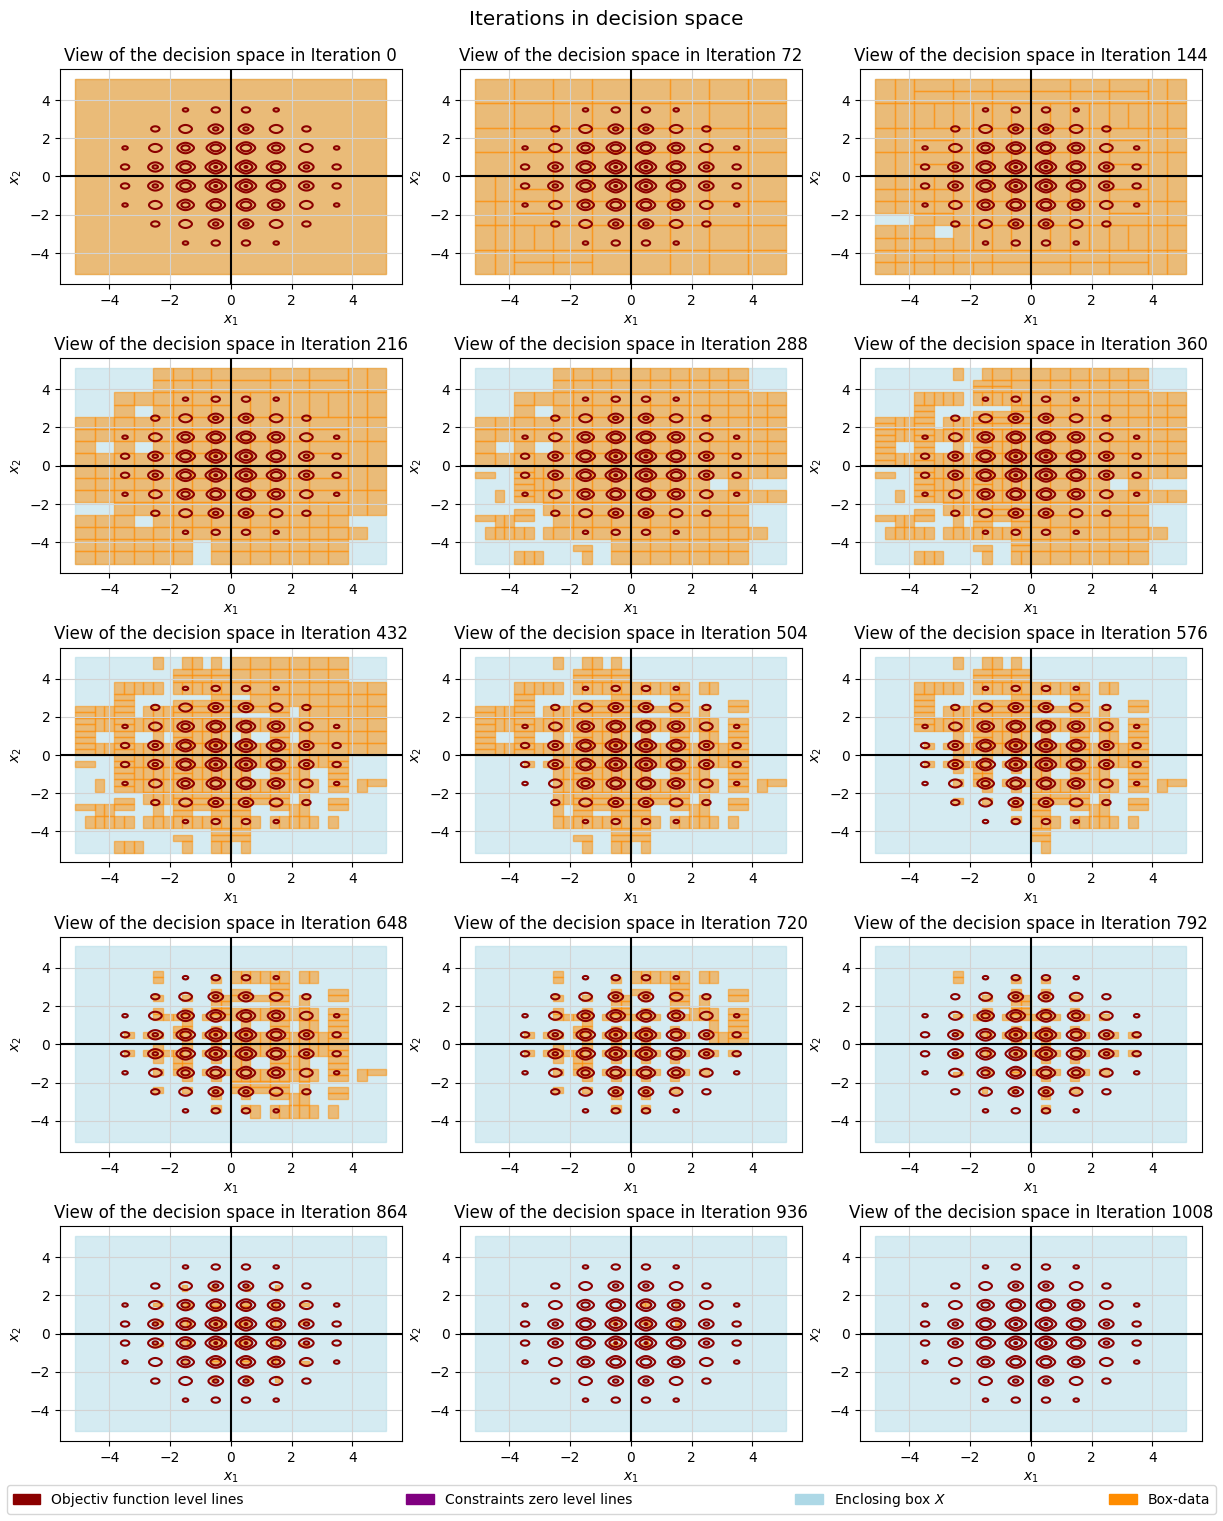

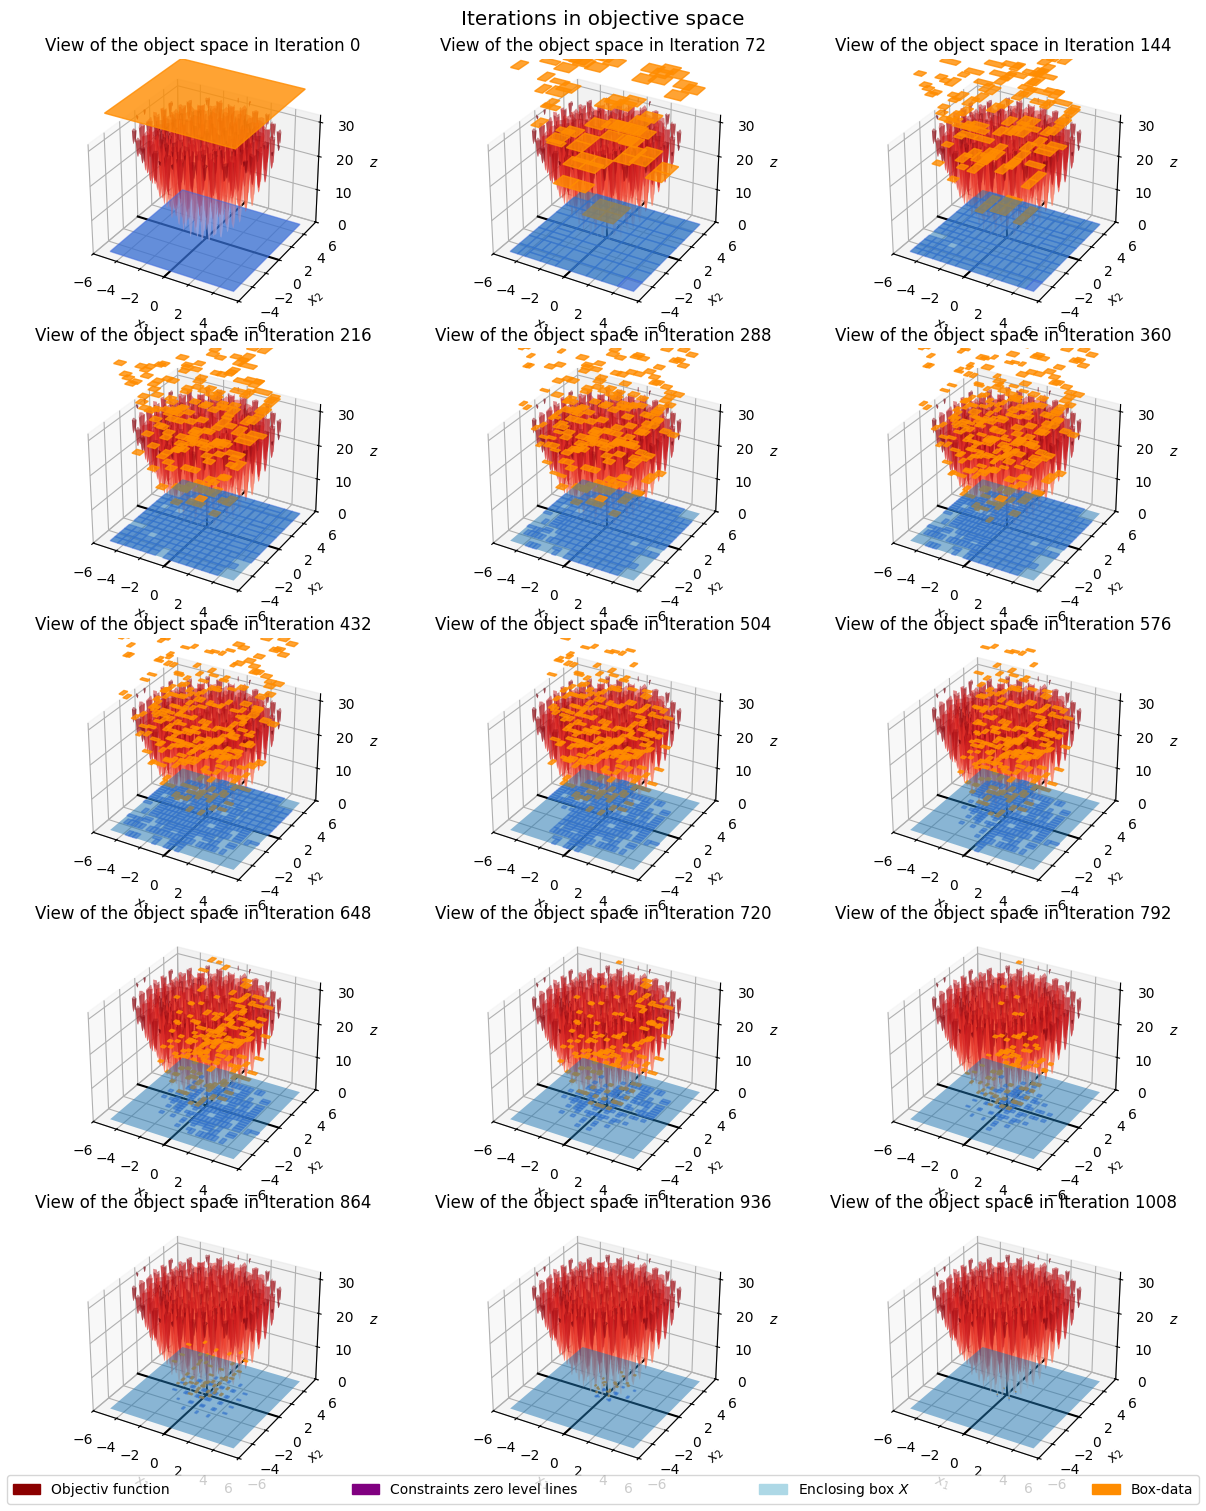

In [ ]:
data_X = dict(zip(rastrigin_mod_save.keys(),[[Oi[0] for Oi in rastrigin_mod_save[k][0]] for k in rastrigin_mod_save]))
iterations = list(data_X.keys())[::round(rastrigin_mod_k/14)]
iterations_in_decision_space_plot(rastrigin_mod_func,None,rastrigin_mod_X,data_X,iterations,levels=[1,8,16],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(rastrigin_mod_func,None,None,rastrigin_mod_X,data_X,iterations,dspace=True,mgres=50,xyzlim=[(-6,6),(-6,6),(0,32)],figsize=(12,15),facecolor="white")

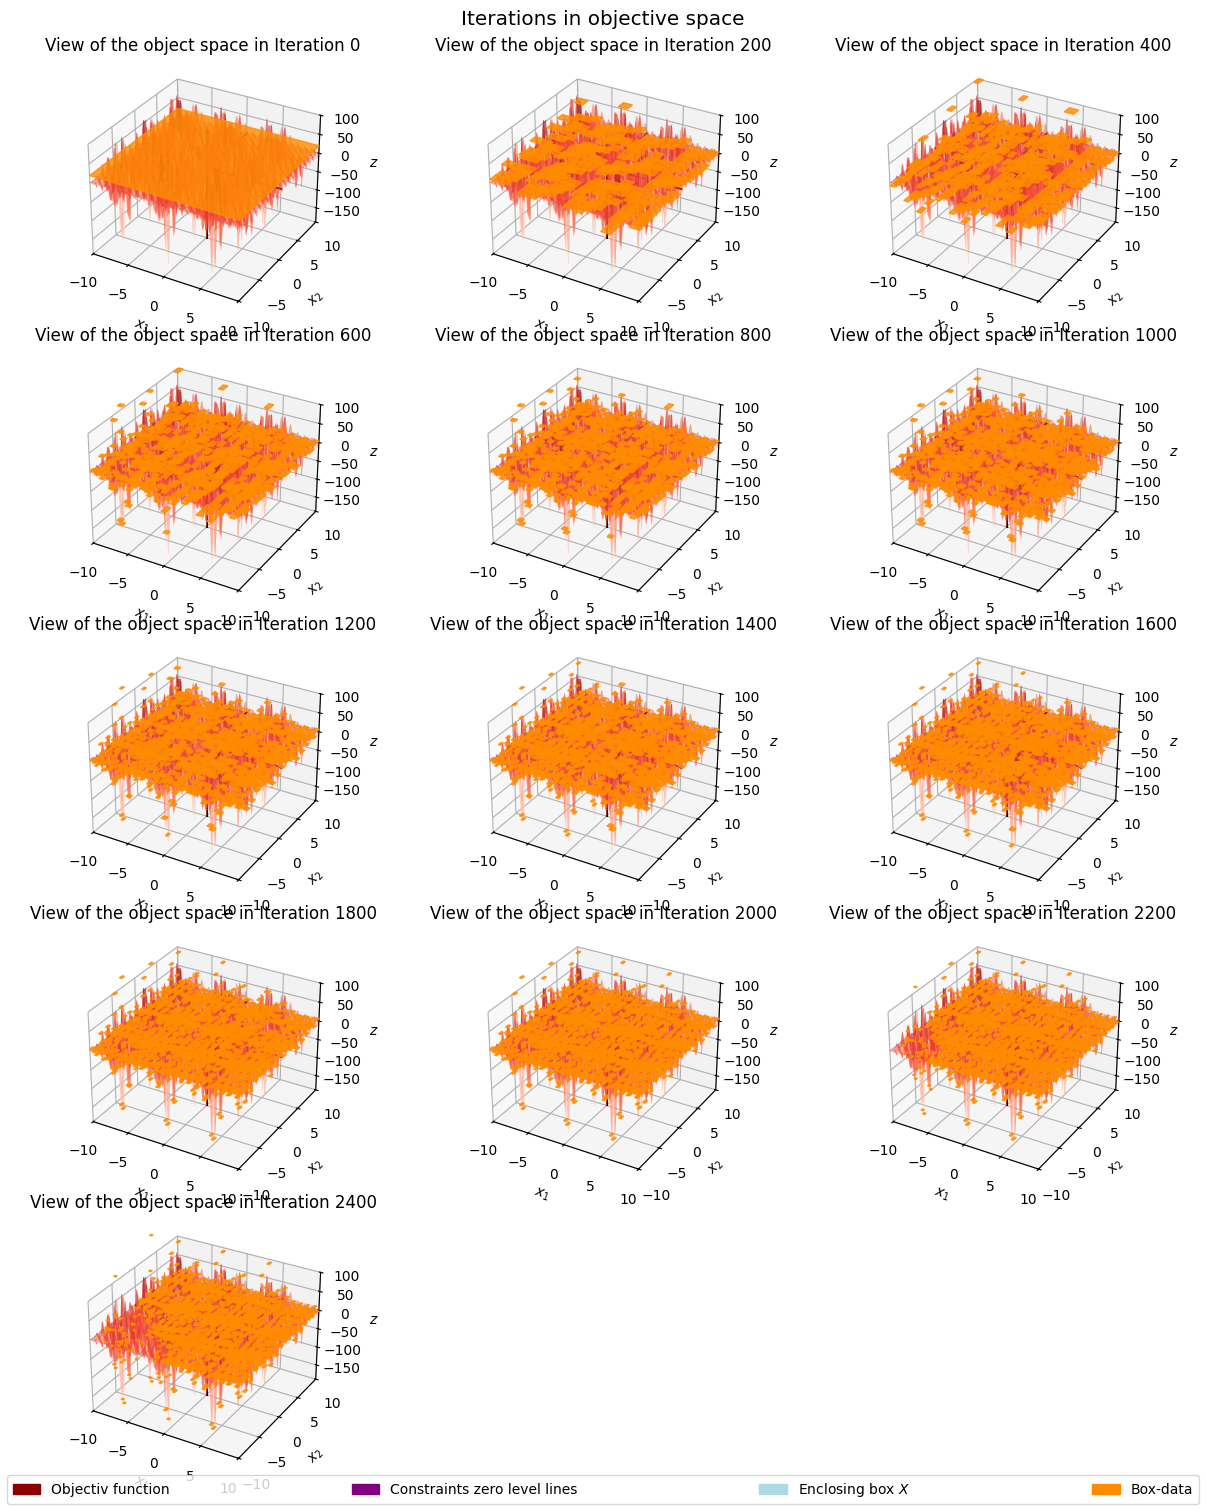

In [54]:
data_X = dict(zip(shubert_save.keys(),[[Oi[0] for Oi in shubert_save[k][0]] for k in shubert_save]))
iterations = list(data_X.keys())[::round(shubert_k/12.5)]
iterations_in_decision_space_plot(shubert_func,None,shubert_X,data_X,iterations,levels=[-186.7,-186.2],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(shubert_func,None,None,shubert_X,data_X,iterations,dspace=False,mgres=50,xyzlim=[(-10,10),(-10,10),(-190,100)],figsize=(12,15),facecolor="white")

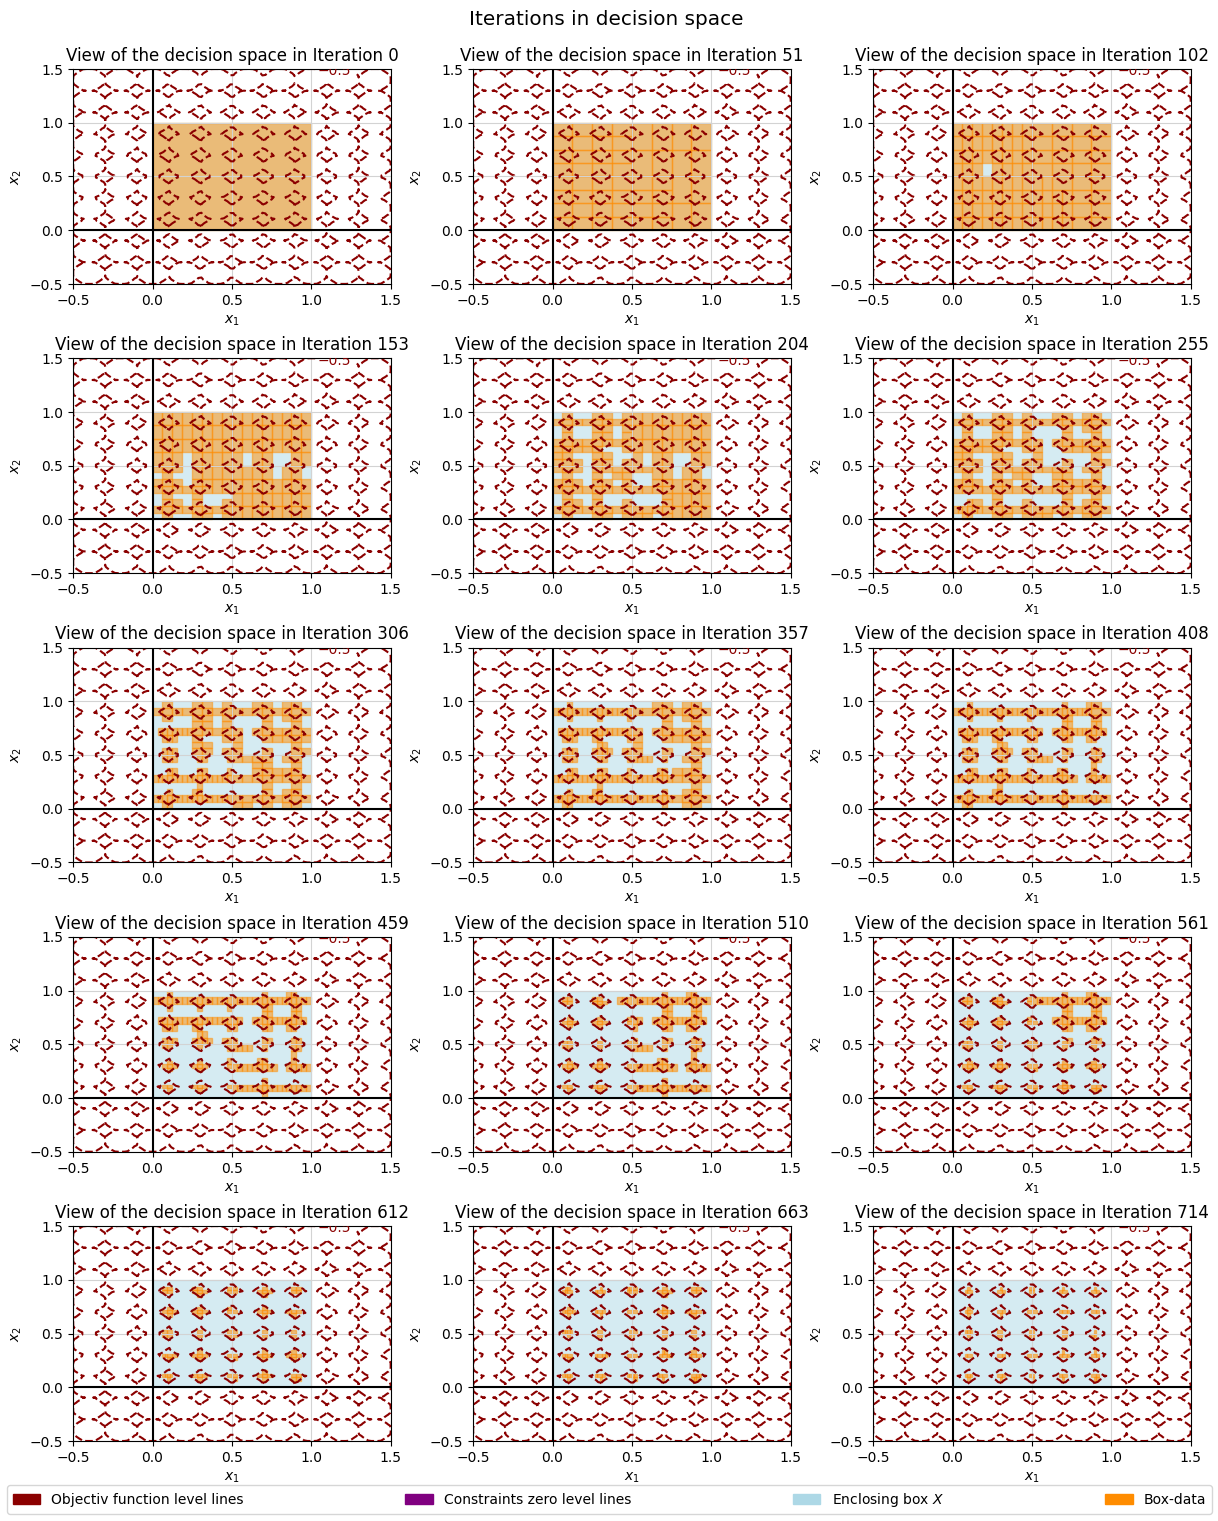

In [63]:
data_X = dict(zip(deb1_save.keys(),[[Oi[0] for Oi in deb1_save[k][0]] for k in deb1_save]))
iterations = list(data_X.keys())[::round(deb1_k/14)]
iterations_in_decision_space_plot(deb1_func,None,deb1_X,data_X,iterations,levels=[-1,-0.5],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(deb1_func,None,None,deb1_X,data_X,iterations,dspace=True,mgres=50,figsize=(12,15),facecolor="white")

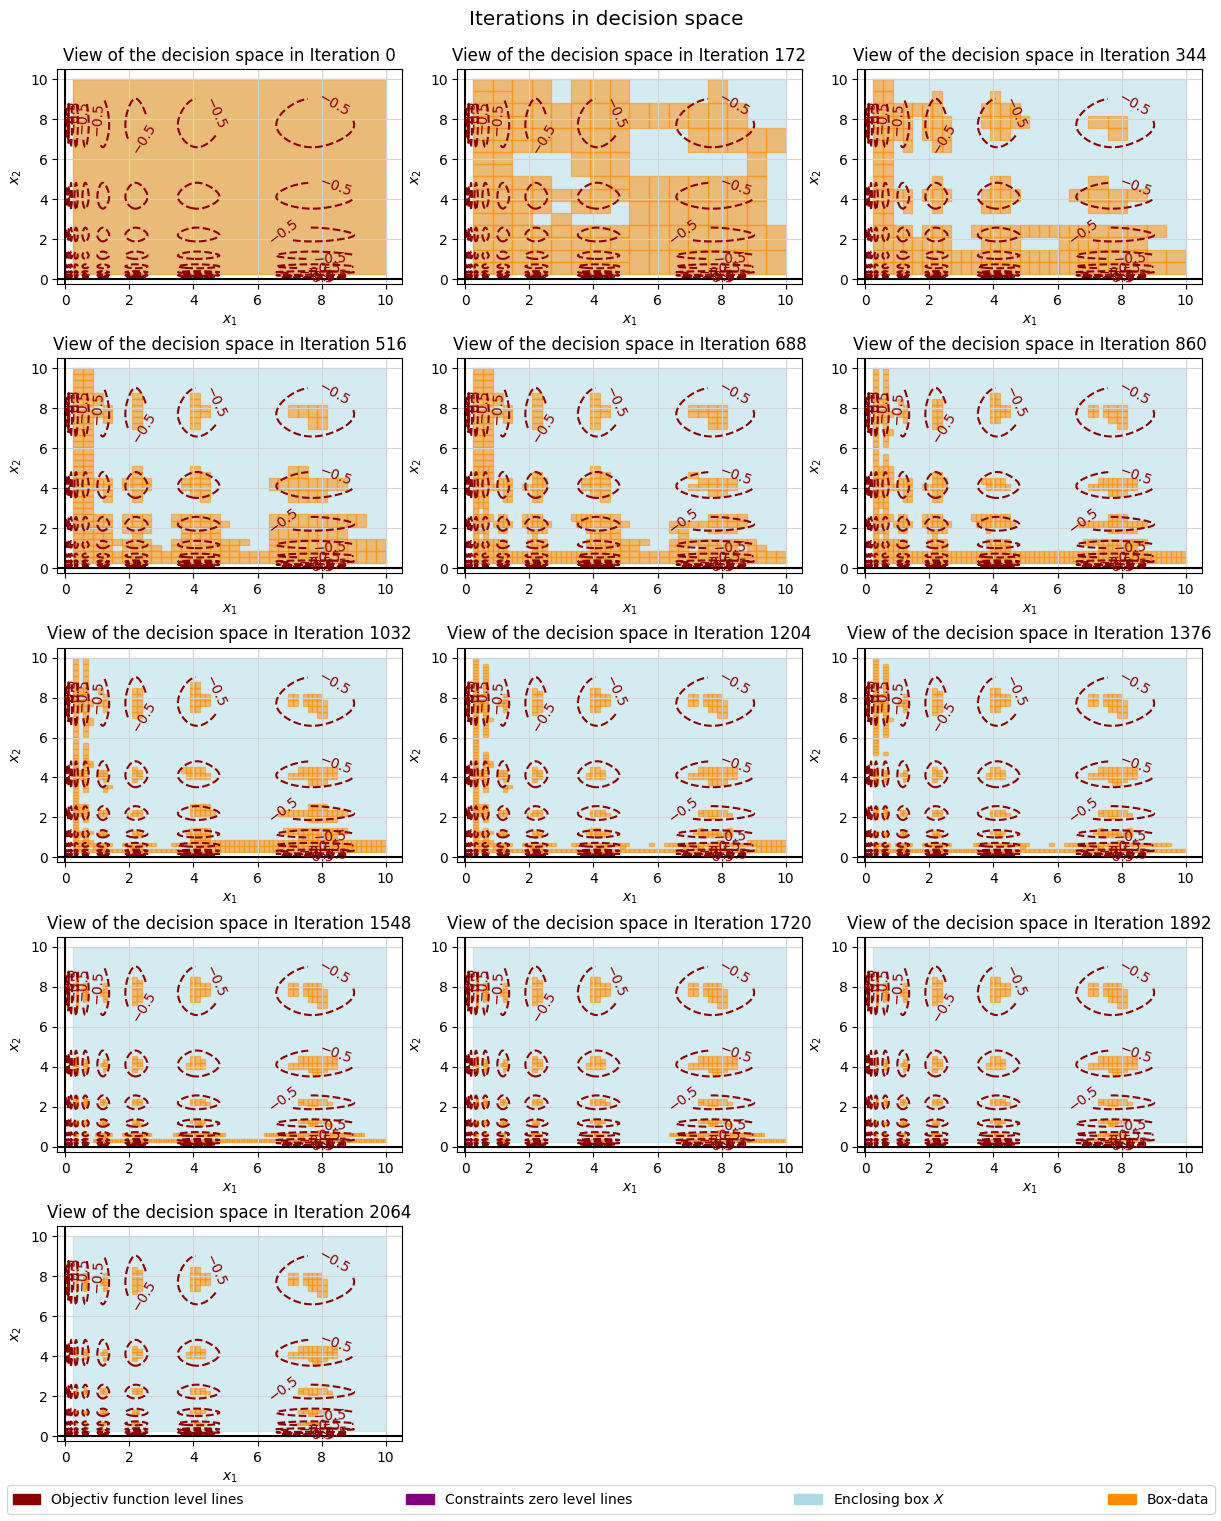

In [76]:
data_X = dict(zip(vincent_save.keys(),[[Oi[0] for Oi in vincent_save[k][0]] for k in vincent_save]))
iterations = list(data_X.keys())[::round(vincent_k/12)]
iterations_in_decision_space_plot(vincent_func,None,vincent_X,data_X,iterations,levels=[-1,-0.5],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(vincent_func,vincent_grad,None,vincent_X,data_X,iterations,dspace=True,mgres=50,xyzlim=[(-0.25,10.5),(-0.25,10.5),(-1,1)],figsize=(12,15),facecolor="white")

### TP7 - De Jong testfunctions (no constraints) 

#### Setting up the optimization problem

In [23]:
def func2(x):
    return 100 *(x[0]**2 -x[1])**2 +(1 -x[0])**2

def grad2(x):
    return obvec([400 *(x[0]**2 -x[1]) *x[0] -2 *(1 -x[0]), -200 *(x[0]**2 -x[1])])

X2 = intvec([[-2,2],[-1,3]])

def func5(x):
    #a = obmat([[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]])
    m, k = 9, 10
    a = obmat([[-9,0,9,-9,0,9,-9,0,9],[-9,-9,-9,0,0,0,9,9,9]])
    return 1/((1/k) +sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2))) for j in range(m)))

def grad5(x):
    #a = obmat([[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]])
    m = 9
    a = obmat([[-9,0,9,-9,0,9,-9,0,9],[-9,-9,-9,0,0,0,9,9,9]])
    return obvec([1/(-sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2)))**2 *(6 *(x[0] -a[0][j])**5) for j in range(m))),1/(-sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2)))**2 *(6 *(x[1] -a[1][j])**5) for j in range(m)))])

X5 = intvec([[-10,10],[-10,10]])

# def cons(x,x_inf, x_sup):
#     return obvec([x[0]-x_sup[0], x[1]-x_sup[1],x_inf[0]-x[0],x_inf[1]-x[1]])

# def cons_div(x,x_inf, x_sup):
#     return obmat([[1,0,-1,0],[0,1,0,-1]])

#### Applying the solver to the optimization problem

In [24]:
with cProfile.Profile() as pr2:
    solution2, k2, save2 = improved_boxres_BandB(func2, grad2, X2, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 0.5, k_max = 2500)

#pr2.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP72_stats")

In [46]:
with cProfile.Profile() as pr5:
    solution5, k5, save5 = improved_boxres_BandB(func5, grad5, X5, bounding_procedure = optimal_centerd_forms, epsilon = 0, epsilon_max = 1, k_max = 5000)

#pr5.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_stats")

#### Outprinting the solver run statistics

In [25]:
print("Iterations needed/done:",k2)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP72_stats")
ps = pstats.Stats(pr2)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 658
         7541164 function calls (7466588 primitive calls) in 3.885 seconds

   Ordered by: cumulative time
   List reduced from 100 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.023    0.023    3.935    3.935 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
     4143    0.049    0.000    3.282    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
   110544    0.364    0.000    2.718    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     8286    0.065    0.000    2.448    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_46654/3057184144.py:4(grad2)
    91146    0.087    0.000    2.333    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.

In [36]:
print("Iterations needed/done:",k5)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_stats")
ps = pstats.Stats(pr5)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 2500
         486478222 function calls (485327033 primitive calls) in 260.762 seconds

   Ordered by: cumulative time
   List reduced from 117 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.235    0.235  268.992  268.992 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:100(improved_boxres_BandB)
    18749    0.278    0.000  253.894    0.014 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
    37498    0.362    0.000  248.824    0.007 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_46654/3057184144.py:15(grad5)
1011198/122493    2.781    0.000  243.104    0.002 {built-in method builtins.sum}
 10400694   31.631    0.000  220.458    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
 10400694   13.595    0.000  178.580    0.000 /Library

#### Checking for inclusion of the solution set

In [26]:
solution_Boxes2 = [Oi[0] for Oi in solution2]
print("The optimal solution of F2: s1 = (1,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes2))

The optimal solution of F2: s1 = (1,1)
Inclusion hold: True


In [52]:
solution_Boxes5 = [Oi[0] for Oi in solution5]
print("The optimal solution of F5: s1 = (-9,-9)")
print("Inclusion hold:",any((-9 in Bi[0]) & (-9 in Bi[1]) for Bi in solution_Boxes5))

The optimal solution of F5: s1 = (-9,-9)
Inclusion hold: False


#### Plotting the solver approximation process

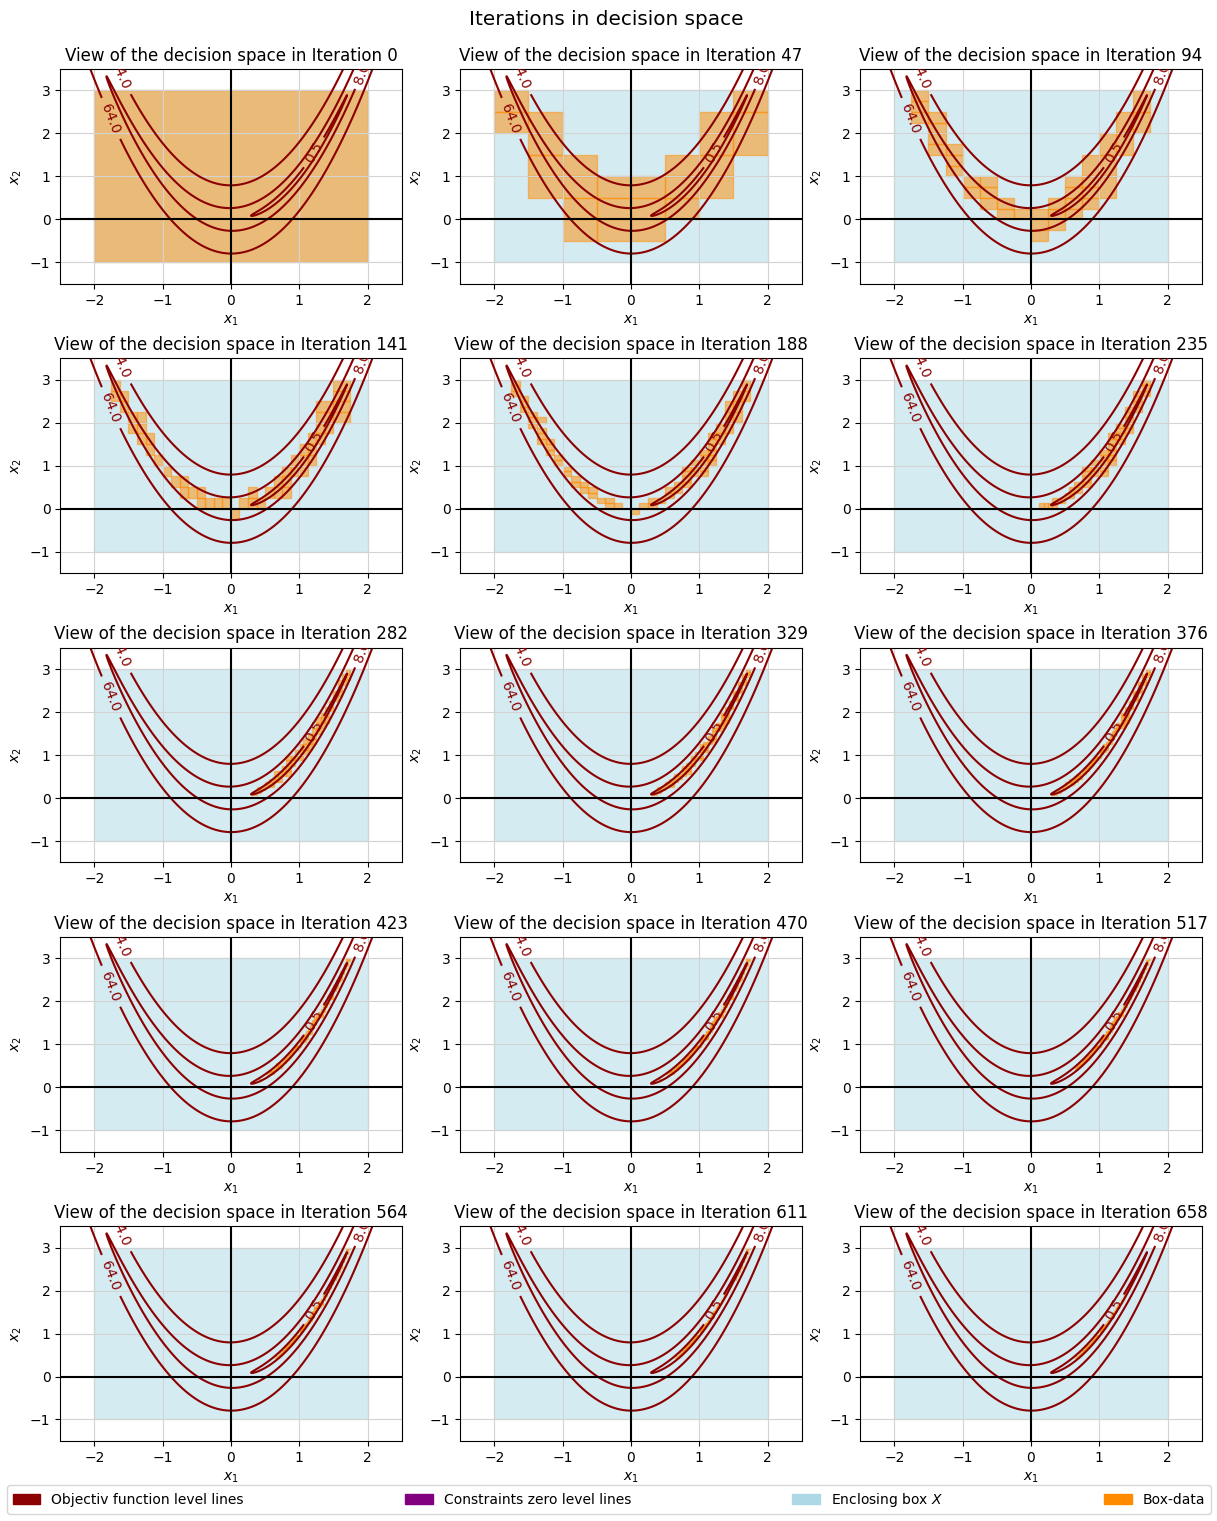

In [34]:
data_X2 = dict(zip(save2.keys(),[[Oi[0] for Oi in save2[k][0]] for k in save2]))
iterations = list(data_X2.keys())[::round(k2/14)]
iterations_in_decision_space_plot(func2,None,X2,data_X2,iterations,levels=[0.5,8,64],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func2,None,None,X2,data_X2,iterations,xyzlim=[(-2.5,2.5),(-1.5,3.5),(0,64)],figsize=(12,15),facecolor="white")

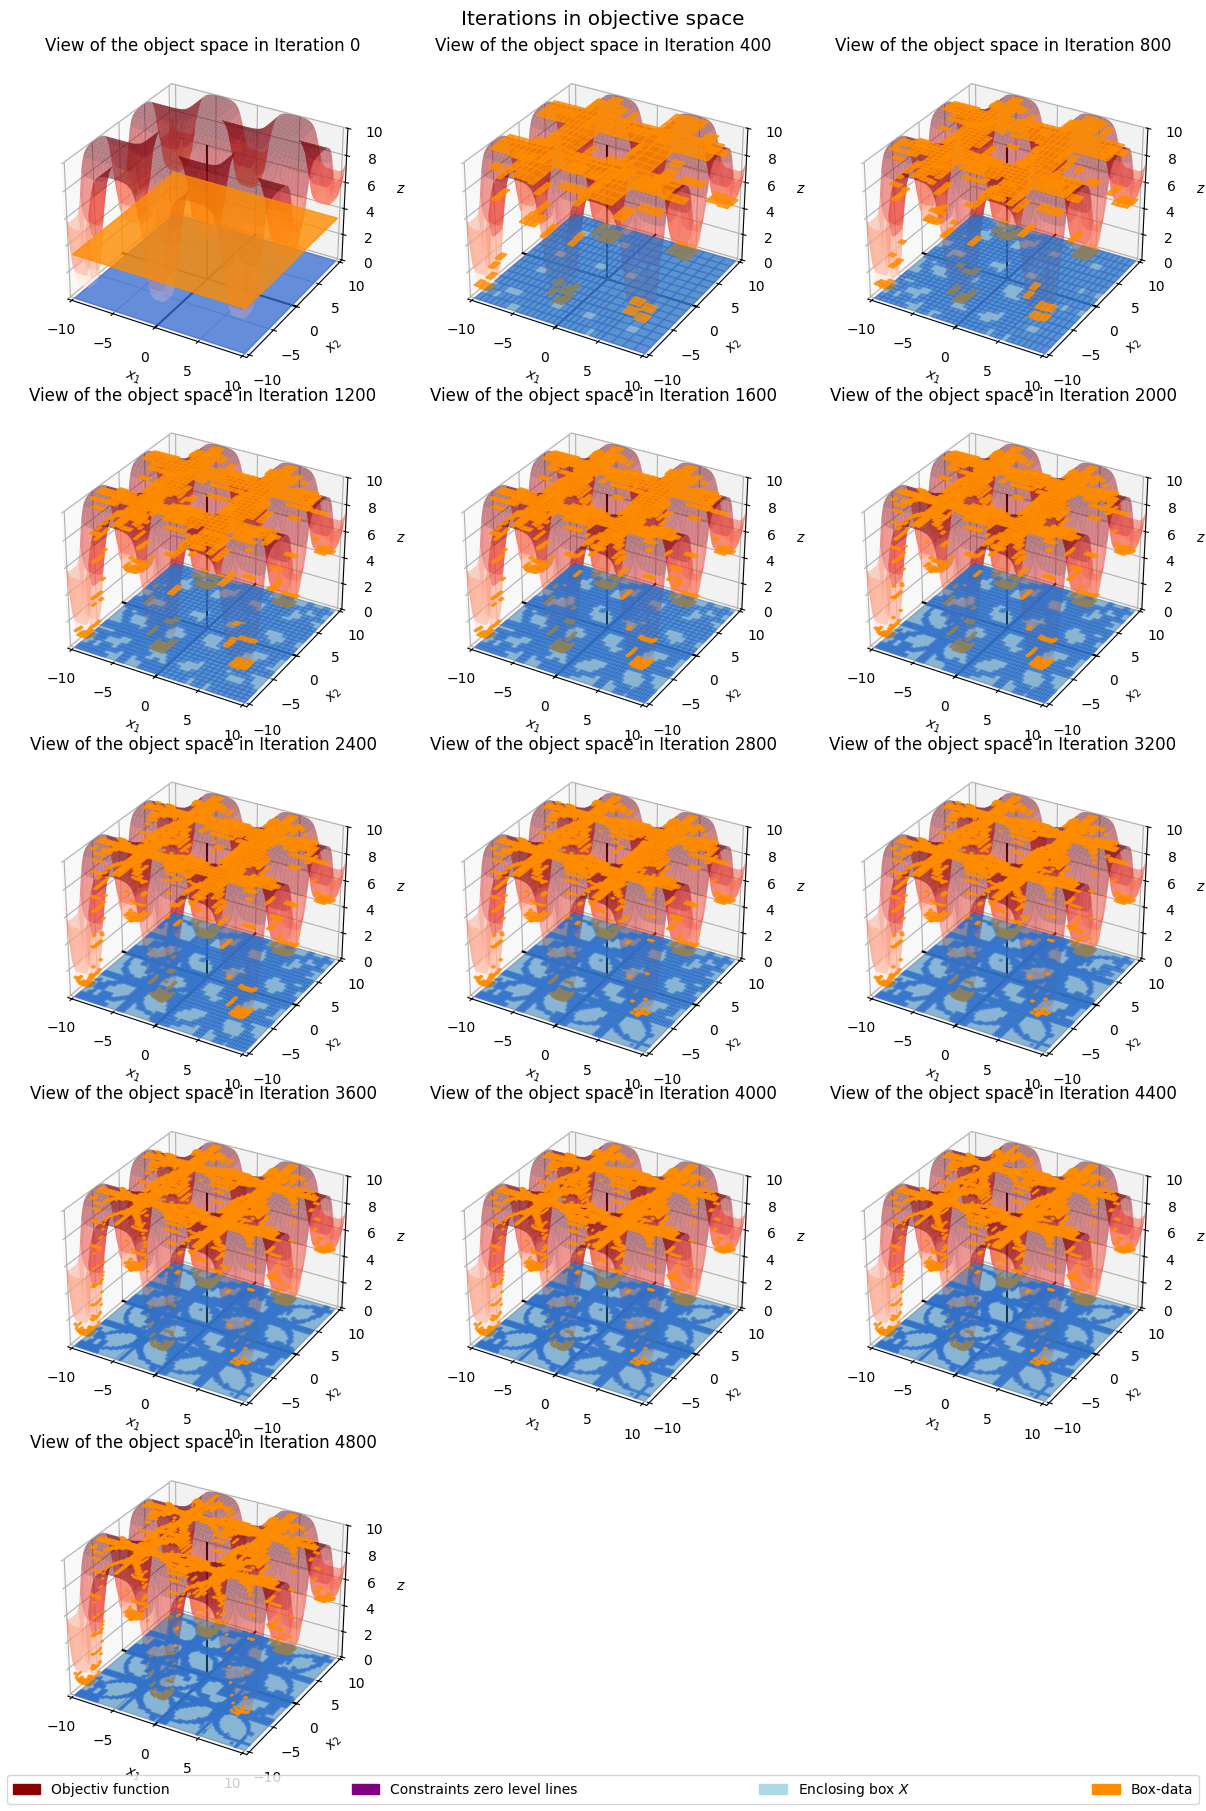

In [54]:
data_X5 = dict(zip(save5.keys(),[[Oi[0] for Oi in save5[k][0]] for k in save5]))
iterations = list(data_X5.keys())[::round(k5/12.5)]
#iterations_in_decision_space_plot(func5,None,X5,data_X5,iterations,figsize=(12,18),facecolor="white")
iterations_in_objective_space_plot(func5,None,None,X5,data_X5,iterations,xyzlim=[(-10.5,10.5),(-10.5,10.5),(0,10)],figsize=(12,18),facecolor="white")